This notebook reprensent the prediction of the enthalpy of formation (Hf) of quaternary Heuslers.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from atm_info import *

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 ## Learning on the unary, binary and ternary database  

In [2]:
database = pd.read_excel("./Data/DATA_TOT_UBT.xlsx")
database = database.query("Enthalpie<300")
database

,Unnamed: 0,DIR,prototype,nT,X1,X2,X3,X4,a,b,...,ElecN4,Eval1,Eval2,Eval3,Eval4,EA,EB,EC,ED,eVal_tot
0,0,10-Mo,phase-W,1,Mo,Mo,Mo,Mo,2.728527,2.728527,...,0.131267,6,6,6,6,-10.94954,-10.94954,-10.94954,-10.94954,24
1,1,11-Nb_sv,phase-W,1,Nb,Nb,Nb,Nb,2.865372,2.865372,...,0.128078,5,5,5,5,-10.21612,-10.21612,-10.21612,-10.21612,20
2,2,12-Ni,phase-W,1,Ni,Ni,Ni,Ni,2.423936,2.423936,...,0.147207,10,10,10,10,-5.46695,-5.46695,-5.46695,-5.46695,40
3,3,13-P,phase-W,1,P,P,P,P,2.639540,2.639540,...,0.206931,5,5,5,5,-5.40967,-5.40967,-5.40967,-5.40967,20
4,4,14-Sb,phase-W,1,Sb,Sb,Sb,Sb,3.280747,3.280747,...,0.191877,5,5,5,5,-4.13565,-4.13565,-4.13565,-4.13565,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76723,34051,74-Cu-Zn-Sn2,Heusler-Inverse,4,Sn,Cu,Zn,Sn,4.946313,4.946313,...,0.178052,4,11,12,4,-3.83392,-3.72720,-1.10764,-3.83392,31
76724,34052,75-Cu-Zn-Sb2,Heusler-Inverse,4,Sb,Cu,Zn,Sb,4.977904,4.977904,...,0.191877,5,11,12,5,-4.13565,-3.72720,-1.10764,-4.13565,33
76725,34053,7-Mn-Co-Si2,Heusler-Inverse,4,Si,Mn,Co,Si,4.011498,4.011498,...,0.178503,4,7,9,4,-5.17948,-8.97821,-7.03500,-5.17948,24
76726,34054,8-Mn-Co-P2,Heusler-Inverse,4,P,Mn,Co,P,4.034537,4.034537,...,0.206931,5,7,9,5,-5.40967,-8.97821,-7.03500,-5.40967,26


In [3]:
#database(DATA)

In [4]:
np.where(pd.isnull(database))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
# Construction of X
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(database[['X1','X2','X3','X4']]) 
Features = [["RayD1", "RayD2","RayD3","RayD4"], ['ElecN1', 'ElecN2', 'ElecN3', 'ElecN4'], ["eVal_tot"]]

for i in Features : 
    Add_Features = pd.DataFrame(MinMaxScaler().fit_transform(database[i]), columns=i) 
    X = np.append(X, Add_Features, axis=1)
    
# Construction of y
y = database['Enthalpie']

print(len(X), len(y))

76614 76614


In [6]:
# Minimum and maximum of features 
print('Rayon min :', database['RayD1'].min(), '; et Rayon max :', database['RayD1'].max()) 
print('ElecN min :', database['ElecN1'].min(), '; et ElecN max :', database['ElecN1'].max()) 
print('EVal_tot min :', database['eVal_tot'].min(), '; et EVal_tot max :', database['eVal_tot'].max()) 

Rayon min : 100 ; et Rayon max : 215
ElecN min : 0.1185082 ; et ElecN max : 0.2390504
EVal_tot min : 8 ; et EVal_tot max : 48


In [7]:
# Randomly separation of the database into 90% trains and 10% tests
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.10, random_state=46, shuffle = True)

In [8]:
%%time
model = MLPRegressor(random_state=10, 
                     max_iter=1000000,
                     activation='tanh',
                     alpha=0.0001,
                     hidden_layer_sizes=(200,200,200), 
                     learning_rate='constant', 
                     solver='sgd')
model.fit(X_train,y_train)

Wall time: 6min 56s


MLPRegressor(activation='tanh', hidden_layer_sizes=(200, 200, 200),
             max_iter=1000000, random_state=10, solver='sgd')

R2 on training data = 0.9999883239403109
R2 on testing data = 0.9991807789434652
RMSE on train data =  0.13863938415119142
RMSE on test data =  1.1392715542516088


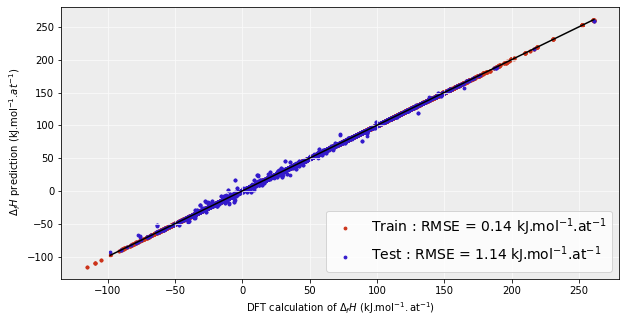

In [14]:
# R2 on train and test 
R2_train = model.score(X_train, y_train)
print("R2 on training data =", R2_train)
R2_test = model.score(X_test, y_test)
print("R2 on testing data =", R2_test)

# Make predictions using the testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
#print("MSE on train data = ", MSE_train)
RMSE_train = math.sqrt(MSE_train)
print("RMSE on train data = ", RMSE_train)

MSE_test = mean_squared_error(y_test, y_test_pred)
#print("MSE on test data = ", MSE_test)
RMSE_test = math.sqrt(MSE_test)
print("RMSE on test data = ", RMSE_test)

# Plot 
x_tmp = np.linspace(min(min(y_test_pred), min(y_test)),max(max(y_test_pred),max(y_test)),100)
y_tmp = np.linspace(min(min(y_test_pred), min(y_test)),max(max(y_test_pred),max(y_test)),100)

fig, ax = plt.subplots(figsize=(10, 5), facecolor=(1., 1., 1.))
ax.scatter(y_train, y_train_pred, s=8,color=(0.8, 0.2, 0.1), label='Train : RMSE = ' + str(round(RMSE_train,2)) + ' kJ.mol$^{-1}$.at$^{-1}$' )
ax.scatter(y_test, y_test_pred, s=8,color=(0.2, 0.1, 0.8),label='Test : RMSE = '+ str(round(RMSE_test,2))+ ' kJ.mol$^{-1}$.at$^{-1}$')

plt.ylabel(' $\Delta_f$$H$ prediction (kJ.mol$^{-1}$.$at^{-1}$)')
plt.xlabel('DFT calculation of $\Delta_f$$H$ (kJ.mol$^{-1}.$at$^{-1}$)') 

ax.plot(x_tmp,y_tmp,c='k')
plt.grid(color=(0.98, 0.98, 0.98)) # 0=noir et 1=blanc 
ax.set_facecolor((0.93, 0.93, 0.93))
ax.legend(loc=4, fontsize=14)

plt.savefig('Image/Prediction_enthalpie_UBT.png',dpi=1000)

In [70]:
%%time

# Cross-validation (Runtime is very long)
CV_RN = cross_val_score(model, X, y, cv = KFold(n_splits=10, shuffle=True,random_state=46), n_jobs =-1, scoring='neg_mean_squared_error' )
rmse_RN = np.sqrt(-1*(CV_RN))
moyennes_RN = np.mean(rmse_RN)
std_RN = np.std(rmse_RN)

print("CV on RMSE test : ", rmse_RN)
print("Moyenne du RMSE : ", moyennes_RN)
print("l'écart-type du RMSE : ", std_RN)

CV on RMSE test :  [1.77915847 1.66797861 1.50387903 1.43239111 1.38554092 1.19647686
 1.63986007 1.61080674 1.70592283 1.3057654 ]
Moyenne du RMSE :  1.522778004390426
l'écart-type du RMSE :  0.1796500310541483
Wall time: 41min 57s


## Quaternary prediction 

### 1. Prediction on 1000 random quaternary combinations (24,000 configurations)

In [15]:
def return_radius_normed(element):
    return ((return_radius(element)-database['RayD1'].min())/(database['RayD1'].max()-database['RayD1'].min()))

def return_elec_neg_normed(element):
    return ((return_elec_neg(element)-database['ElecN1'].min())/(database['ElecN1'].max()-database['ElecN1'].min()))

def return_valen_tot_normed(A, B, C, D):
    element = return_valen_el(A)+return_valen_el(B)+return_valen_el(C)+return_valen_el(D)
    return pd.DataFrame([(element-database['eVal_tot'].min())/(database['eVal_tot'].max()-database['eVal_tot'].min())])
 
def return_calcul(A,B,C,D):
    config=X[(X['X1'] == A) & (X['X2'] == B) & (X['X3'] == C) & (X['X4'] == D)]
    return y[config.index[0]]

def return_predic(A, B, C, D, ohe, model):
    A_Pred=pd.DataFrame([[A,B,C,D]], columns = ['X1','X2','X3','X4'])
    X_pred = ohe.transform(A_Pred)
    for i in [A_Pred.applymap(return_radius_normed), A_Pred.applymap(return_elec_neg_normed), return_valen_tot_normed(A,B,C,D)] : 
        X_pred = np.append(X_pred, i, axis=1) 
    pred = model.predict(X_pred)[0]
    return pred

In [16]:
%%time
model.fit(X,y)

# Evaluation 
y_train_pred = model.predict(X)
R2_train = model.score(X, y)
print("R2 on training data =", R2_train)
MSE_train = mean_squared_error(y, y_train_pred)
print("MSE on train data = ", MSE_train)
RMSE_train = math.sqrt(MSE_train)
print("RMSE on train data = ", RMSE_train)

R2 on training data = 0.9999886049312707
MSE on train data =  0.018688862056499948
RMSE on train data =  0.1367072128912734
Wall time: 7min 32s


In [17]:
# Prediction of 24,000 quaternary configurations  
Quatern = pd.read_excel("./Data/Quaternaires_24000_DFT.xlsx")
Quatern

,Unnamed: 0,DIR,prototype,A,B,C,D,nA,nB,nC,...,dosf,dosfat,eta,bu,bd,abd,X1,X2,X3,X4
0,0,1000-Ta-W-Fe-Co,Heusler_Quaternaires_C1,Ta,W,Fe,Co,1,1,1,...,3.950862,0.987715,metal,3.824956,-0.125906,0.125906,Ta,W,Fe,Co
1,1,100-Ti-Cr-W-Sn,Heusler_Quaternaires_C1,Ti,Cr,W,Sn,1,1,1,...,9.848608,2.462152,metal,4.919480,-4.929128,4.929128,Ti,Cr,W,Sn
2,2,101-Zr_sv-Cr-Zn-Al,Heusler_Quaternaires_C1,Zr,Cr,Zn,Al,1,1,1,...,1.189263,0.297316,metal,0.365224,-0.824039,0.824039,Zr,Cr,Zn,Al
3,3,102-Zr_sv-Cr-Sr_sv-Fe,Heusler_Quaternaires_C1,Zr,Cr,Sr,Fe,1,1,1,...,5.046228,1.261557,metal,3.678260,-1.367967,1.367967,Zr,Cr,Sr,Fe
4,4,103-W-Ba_sv-La-P,Heusler_Quaternaires_C1,W,Ba,La,P,1,1,1,...,4.560678,1.140170,metal,0.847548,-3.713130,3.713130,W,Ba,La,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,2995,997-Zr_sv-Zn-V-Mo,Heusler_Quaternaires_C3,Zr,Zn,V,Mo,1,1,1,...,5.233345,1.308336,metal,2.616672,-2.616672,2.616672,V,Mo,Zn,Zr
23996,2996,998-Cr-Sb-La-Cu,Heusler_Quaternaires_C3,Cr,Sb,La,Cu,1,1,1,...,9.437861,2.359465,metal,4.717477,-4.720384,4.720384,La,Cu,Sb,Cr
23997,2997,999-Mo-P-Sr_sv-Ni,Heusler_Quaternaires_C3,Mo,P,Sr,Ni,1,1,1,...,3.534955,0.883739,metal,1.259805,-2.275151,2.275151,Sr,Ni,P,Mo
23998,2998,99-V-Ni-Mo-W,Heusler_Quaternaires_C3,V,Ni,Mo,W,1,1,1,...,6.452037,1.613009,metal,3.226019,-3.226019,3.226019,Mo,W,Ni,V


In [18]:
%%time
Prediction = Quatern.copy()
Prediction = Prediction[["X1","X2","X3","X4","Hf"]]
Prediction['Pred_Hf'] = Prediction.apply(lambda x: return_predic(x.X1, x.X2, x.X3, x.X4, ohe, model), axis=1)
Prediction

Wall time: 1min 24s


,X1,X2,X3,X4,Hf,Pred_Hf
0,Ta,W,Fe,Co,6.601067,17.389759
1,Ti,Cr,W,Sn,17.243544,18.721505
2,Zr,Cr,Zn,Al,-6.385002,30.687196
3,Zr,Cr,Sr,Fe,86.481557,108.675992
4,W,Ba,La,P,74.660955,66.308030
...,...,...,...,...,...,...
23995,V,Mo,Zn,Zr,28.339454,33.328493
23996,La,Cu,Sb,Cr,65.791036,79.426002
23997,Sr,Ni,P,Mo,85.967503,81.727118
23998,Mo,W,Ni,V,17.172627,19.652737


In [19]:
#Prediction.to_excel("Data/Prediction_Quaternaires_24000_DFT.xlsx") 

Prediction = pd.read_excel("Data/Prediction_Quaternaires_24000_DFT.xlsx")
Prediction

,Unnamed: 0,X1,X2,X3,X4,Hf,Pred_Hf
0,0,Ta,W,Fe,Co,6.601067,17.389759
1,1,Ti,Cr,W,Sn,17.243544,18.721505
2,2,Zr,Cr,Zn,Al,-6.385002,30.687196
3,3,Zr,Cr,Sr,Fe,86.481557,108.675992
4,4,W,Ba,La,P,74.660955,66.308030
...,...,...,...,...,...,...,...
23995,23995,V,Mo,Zn,Zr,28.339454,33.328493
23996,23996,La,Cu,Sb,Cr,65.791036,79.426002
23997,23997,Sr,Ni,P,Mo,85.967503,81.727118
23998,23998,Mo,W,Ni,V,17.172627,19.652737


MSE on train data =  0.018688862056499948
RMSE on train data =  11.302160847536587
MAE on train data =  7.082737079760622


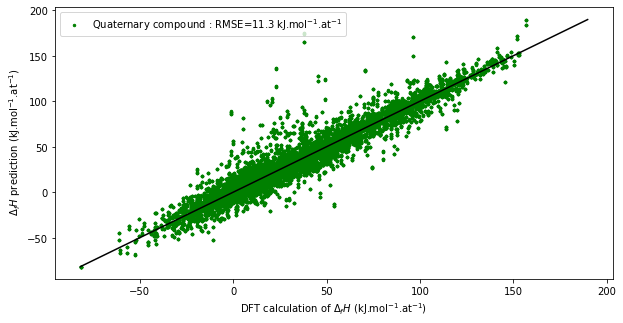

In [23]:
y_pred = Prediction['Pred_Hf']
y_calc = Prediction['Hf']

MSE_q = mean_squared_error(y_calc, y_pred)
print("MSE on train data = ", MSE_train)

RMSE_q = math.sqrt(MSE_q)
print("RMSE on train data = ", RMSE_q)

MAE_q = mean_absolute_error(y_calc, y_pred)
print("MAE on train data = ", MAE_q)

x_tmp = np.linspace(min(min(y_pred), min(y_calc)),max(max(y_pred),max(y_calc)),100)
y_tmp = np.linspace(min(min(y_pred), min(y_calc)),max(max(y_pred),max(y_calc)),100)

plt.figure(figsize=(10, 5))
plt.scatter(y_calc, y_pred,  s=6,c='g', label='Quaternary compound : RMSE=' + str(round(RMSE_q ,2)) + ' kJ.mol$^{-1}$.at$^{-1}$' )
plt.ylabel(' $\Delta_f$$H$ prediction (kJ.mol$^{-1}$.at$^{-1}$)')
plt.xlabel('DFT calculation of $\Delta_f$$H$ (kJ.mol$^{-1}$.at$^{-1}$)')
plt.plot(x_tmp,y_tmp,c='k')
plt.legend(loc=2)

plt.savefig("Image/Quaternary_prediction_24000_RMSE.png",dpi=1500)

### 2.prediction of all quaternaries 

In [246]:
def Prediction_Hf(Predic_file) : 
    Prediction_ = Predic_file.copy()
    Prediction_['Pred_Hf'] = Prediction_.apply(lambda x: return_predic(x.X1, x.X2, x.X3, x.X4, ohe, model), axis=1)
    return Prediction_

In [19]:
Quatern1 = pd.read_excel("./Data/All_combinaisons_quaternaires.xlsx",  sheet_name="All_Config1")
Quatern2 = pd.read_excel("./Data/All_combinaisons_quaternaires.xlsx",  sheet_name="All_Config2")
Quatern3 = pd.read_excel("./Data/All_combinaisons_quaternaires.xlsx",  sheet_name="All_Config3")

In [247]:
Quatern1['prototype'] = 'Quatern_Config_1'
Prediction1 = Prediction_Hf(Quatern1)
Prediction1

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,Zr,Hf,V,Quatern_Config_1,25.254728
1,Ti,Zr,Hf,Nb,Quatern_Config_1,13.254971
2,Ti,Zr,Hf,Ta,Quatern_Config_1,15.189837
3,Ti,Zr,Hf,Cr,Quatern_Config_1,29.787870
4,Ti,Zr,Hf,Mo,Quatern_Config_1,10.152554
...,...,...,...,...,...,...
85003,Sn,Si,P,Al,Quatern_Config_1,42.729958
85004,Sb,Si,P,Al,Quatern_Config_1,43.913123
85005,Sb,Sn,P,Al,Quatern_Config_1,40.025952
85006,Sb,Sn,Si,Al,Quatern_Config_1,28.336631


In [248]:
Quatern2['prototype'] = 'Quatern_Config_2'
Prediction2 = Prediction_Hf(Quatern2)
Prediction2

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,Hf,Zr,V,Quatern_Config_2,23.034879
1,Ti,Hf,Zr,Nb,Quatern_Config_2,14.276852
2,Ti,Hf,Zr,Ta,Quatern_Config_2,16.367689
3,Ti,Hf,Zr,Cr,Quatern_Config_2,27.104223
4,Ti,Hf,Zr,Mo,Quatern_Config_2,10.287092
...,...,...,...,...,...,...
85003,Sn,P,Si,Al,Quatern_Config_2,38.544171
85004,Sb,P,Si,Al,Quatern_Config_2,39.861762
85005,Sb,P,Sn,Al,Quatern_Config_2,36.245216
85006,Sb,Si,Sn,Al,Quatern_Config_2,30.795931


In [249]:
Quatern3['prototype'] = 'Quatern_Config_3'
Prediction3 = Prediction_Hf(Quatern3)
Prediction3

In [250]:
Nom_Output = "Data/Prection_all_combinaisons_quaternaires_Hf_UBT.xlsx"  # Nom du fichier d'excel  
writer = pd.ExcelWriter(Nom_Output)
Prediction1.to_excel(writer, sheet_name='Pred_Config1', index=False)
Prediction2.to_excel(writer, sheet_name='Pred_Config2', index=False)
Prediction3.to_excel(writer, sheet_name='Pred_Config3', index=False)
writer.save()

### 3.prediction of all quaternaries using the unary, binary, ternary and quaternary database 

In [20]:
# Importing and cleaning the learning database
database = pd.read_excel("./Data/DATA_TOT_UBTQ.xlsx")
database = database.query("Enthalpie<300") 
database

,Unnamed: 0,DIR,prototype,nT,X1,X2,X3,X4,a,b,...,ElecN4,Eval1,Eval2,Eval3,Eval4,EA,EB,EC,ED,eVal_tot
0,0,1000-Ta-W-Fe-Co,Heusler_Quaternaires_C1,4,Ta,W,Co,Fe,4.289209,4.289209,...,0.139253,5,6,9,8,-11.86253,-13.01940,-7.03500,-8.23670,28
1,1,100-Ti-Cr-W-Sn,Heusler_Quaternaires_C1,4,Ti,Cr,Sn,W,4.478309,4.478309,...,0.239050,4,6,4,6,-7.76229,-9.49622,-3.83392,-13.01940,20
2,2,101-Zr_sv-Cr-Zn-Al,Heusler_Quaternaires_C1,4,Zr,Cr,Al,Zn,4.547702,4.547702,...,0.155152,4,6,3,12,-8.52067,-9.49622,-3.74653,-1.10764,25
3,3,102-Zr_sv-Cr-Sr_sv-Fe,Heusler_Quaternaires_C1,4,Zr,Cr,Fe,Sr,4.878182,4.878182,...,0.118508,4,6,8,2,-8.52067,-9.49622,-8.23670,-1.63716,20
4,4,103-W-Ba_sv-La-P,Heusler_Quaternaires_C1,4,W,Ba,P,La,5.173283,5.173283,...,0.163142,6,2,5,3,-13.01940,-1.90828,-5.40967,-4.88563,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100723,76723,74-Cu-Zn-Sn2,Heusler-Inverse,4,Sn,Cu,Zn,Sn,4.946313,4.946313,...,0.178052,4,11,12,4,-3.83392,-3.72720,-1.10764,-3.83392,31
100724,76724,75-Cu-Zn-Sb2,Heusler-Inverse,4,Sb,Cu,Zn,Sb,4.977904,4.977904,...,0.191877,5,11,12,5,-4.13565,-3.72720,-1.10764,-4.13565,33
100725,76725,7-Mn-Co-Si2,Heusler-Inverse,4,Si,Mn,Co,Si,4.011498,4.011498,...,0.178503,4,7,9,4,-5.17948,-8.97821,-7.03500,-5.17948,24
100726,76726,8-Mn-Co-P2,Heusler-Inverse,4,P,Mn,Co,P,4.034537,4.034537,...,0.206931,5,7,9,5,-5.40967,-8.97821,-7.03500,-5.40967,26


In [253]:
# Construction of X 
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(database[['X1','X2','X3','X4']]) 
Features = [["RayD1", "RayD2","RayD3","RayD4"], ['ElecN1', 'ElecN2', 'ElecN3', 'ElecN4'], ["eVal_tot"]]

for i in Features : 
    Add_Features = pd.DataFrame(MinMaxScaler().fit_transform(database[i]), columns=i) 
    X = np.append(X, Add_Features, axis=1)
    
# Construction of y 
y = database['Enthalpie']

print(len(X), len(y))

100614 100614


In [254]:
%%time
model = MLPRegressor(random_state=10, 
                     max_iter=1000000,
                     activation='tanh',
                     alpha=0.0001,
                     hidden_layer_sizes=(200,200,200), 
                     learning_rate='constant', 
                     solver='sgd')
model.fit(X,y)

Wall time: 10min 10s


MLPRegressor(activation='tanh', hidden_layer_sizes=(200, 200, 200),
             max_iter=1000000, random_state=10, solver='sgd')

In [255]:
# Metric
y_train_pred = model.predict(X)

R2_train = model.score(X, y)
print("R2 on training data =", R2_train)
MSE_train = mean_squared_error(y, y_train_pred)
print("MSE on train data = ", MSE_train)
RMSE_train = math.sqrt(MSE_train)
print("RMSE on train data = ", RMSE_train)

R2 on training data = 0.9999932371292044
MSE on train data =  0.010762583115002606
RMSE on train data =  0.10374287018876337


In [257]:
%%time
Prediction1 = Prediction_Hf(Quatern1)
Prediction2 = Prediction_Hf(Quatern2)
Prediction3 = Prediction_Hf(Quatern3)

Wall time: 19min 47s


In [258]:
Prediction1

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,Zr,Hf,V,Quatern_Config_1,25.478134
1,Ti,Zr,Hf,Nb,Quatern_Config_1,12.711378
2,Ti,Zr,Hf,Ta,Quatern_Config_1,14.432825
3,Ti,Zr,Hf,Cr,Quatern_Config_1,28.347481
4,Ti,Zr,Hf,Mo,Quatern_Config_1,11.662334
...,...,...,...,...,...,...
85003,Sn,Si,P,Al,Quatern_Config_1,40.298799
85004,Sb,Si,P,Al,Quatern_Config_1,44.518981
85005,Sb,Sn,P,Al,Quatern_Config_1,34.295291
85006,Sb,Sn,Si,Al,Quatern_Config_1,29.527296


In [259]:
Prediction2

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,Hf,Zr,V,Quatern_Config_2,24.577896
1,Ti,Hf,Zr,Nb,Quatern_Config_2,12.617556
2,Ti,Hf,Zr,Ta,Quatern_Config_2,14.975129
3,Ti,Hf,Zr,Cr,Quatern_Config_2,28.347707
4,Ti,Hf,Zr,Mo,Quatern_Config_2,8.982943
...,...,...,...,...,...,...
85003,Sn,P,Si,Al,Quatern_Config_2,38.358068
85004,Sb,P,Si,Al,Quatern_Config_2,39.981471
85005,Sb,P,Sn,Al,Quatern_Config_2,31.017027
85006,Sb,Si,Sn,Al,Quatern_Config_2,32.191904


In [260]:
Prediction3

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,V,Zr,Hf,Quatern_Config_3,17.384509
1,Ti,Nb,Zr,Hf,Quatern_Config_3,12.733389
2,Ti,Ta,Zr,Hf,Quatern_Config_3,15.624261
3,Ti,Cr,Zr,Hf,Quatern_Config_3,21.407520
4,Ti,Mo,Zr,Hf,Quatern_Config_3,9.190846
...,...,...,...,...,...,...
85003,Si,P,Sn,Al,Quatern_Config_3,33.572886
85004,Si,P,Sb,Al,Quatern_Config_3,36.736008
85005,Sn,P,Sb,Al,Quatern_Config_3,38.301628
85006,Sn,Si,Sb,Al,Quatern_Config_3,34.480377


In [261]:
Nom_Output = "Data/Prection_all_combinaisons_quaternaires_Hf_UBTQ.xlsx"  # Nom du fichier d'excel  
writer = pd.ExcelWriter(Nom_Output)
Prediction1.to_excel(writer, sheet_name='Pred_Config1', index=False)
Prediction2.to_excel(writer, sheet_name='Pred_Config2', index=False)
Prediction3.to_excel(writer, sheet_name='Pred_Config3', index=False)
writer.save()

## Analyse de prédiction des configurations quaternaires

In [6]:
def recherche(data, A, B, C, D) : 
    Compose = data.loc[((data['X1']==A)|(data['X2']==A))|((data['X3']==A)|(data['X4']==A))]
    Compose = Compose.loc[((Compose['X1']==B)|(Compose['X2']==B))|((Compose['X3']==B)|(Compose['X4']==B))]
    Compose = Compose.loc[((Compose['X1']==C)|(Compose['X2']==C))|((Compose['X3']==C)|(Compose['X4']==C))]
    Compose = Compose.loc[((Compose['X1']==D)|(Compose['X2']==D))|((Compose['X3']==D)|(Compose['X4']==D))]
    return Compose

In [21]:
Analyse_Pred1 = pd.read_excel("Data/Prection_all_combinaisons_quaternaires_Hf_UBTQ.xlsx",'Pred_Config1')
Analyse_Pred2 = pd.read_excel("Data/Prection_all_combinaisons_quaternaires_Hf_UBTQ.xlsx",'Pred_Config2')
Analyse_Pred3 = pd.read_excel("Data/Prection_all_combinaisons_quaternaires_Hf_UBTQ.xlsx",'Pred_Config3')

In [5]:
Analyse_Pred = pd.concat([Analyse_Pred1, Analyse_Pred2])
Analyse_Pred = pd.concat([Analyse_Pred, Analyse_Pred3])
Analyse_Pred

,X1,X2,X3,X4,prototype,Pred_Hf
0,Ti,Zr,Hf,V,Quatern_Config_1,25.478134
1,Ti,Zr,Hf,Nb,Quatern_Config_1,12.711378
2,Ti,Zr,Hf,Ta,Quatern_Config_1,14.432825
3,Ti,Zr,Hf,Cr,Quatern_Config_1,28.347481
4,Ti,Zr,Hf,Mo,Quatern_Config_1,11.662334
...,...,...,...,...,...,...
85003,Si,P,Sn,Al,Quatern_Config_3,33.572886
85004,Si,P,Sb,Al,Quatern_Config_3,36.736008
85005,Sn,P,Sb,Al,Quatern_Config_3,38.301628
85006,Sn,Si,Sb,Al,Quatern_Config_3,34.480377


In [7]:
Analyse_Pred.loc[Analyse_Pred['Pred_Hf']<=0]

,X1,X2,X3,X4,prototype,Pred_Hf
16,Ti,Zr,Hf,Al,Quatern_Config_1,-5.413434
18,Ti,Zr,Hf,Si,Quatern_Config_1,-12.028251
19,Ti,Zr,Hf,Sn,Quatern_Config_1,-11.388621
20,Ti,Zr,Hf,Sb,Quatern_Config_1,-1.121366
32,Ti,Zr,V,Co,Quatern_Config_1,-2.304027
...,...,...,...,...,...,...
84890,Zn,Ni,Si,Co,Quatern_Config_3,-7.448325
84893,Al,Ni,P,Co,Quatern_Config_3,-0.831226
84894,Al,Ni,Si,Co,Quatern_Config_3,-17.409261
84938,Zn,Cu,Al,Ni,Quatern_Config_3,-18.113410


In [10]:
Analyse_Pred.loc[(Analyse_Pred['Pred_Hf']<=25)&(Analyse_Pred['Pred_Hf']>0)]

,X1,X2,X3,X4,prototype,Pred_Hf
1,Ti,Zr,Hf,Nb,Quatern_Config_1,12.711378
2,Ti,Zr,Hf,Ta,Quatern_Config_1,14.432825
4,Ti,Zr,Hf,Mo,Quatern_Config_1,11.662334
5,Ti,Zr,Hf,W,Quatern_Config_1,16.526215
10,Ti,Zr,Hf,Mn,Quatern_Config_1,19.709577
...,...,...,...,...,...,...
84957,P,Zn,Si,Ni,Quatern_Config_3,23.907574
84963,P,Al,Si,Ni,Quatern_Config_3,16.716972
84973,Al,Zn,P,Cu,Quatern_Config_3,17.153056
84974,Al,Zn,Si,Cu,Quatern_Config_3,16.984002


In [14]:
# Total list of atoms:
elements = ["Ti","Zr","Hf","V","Nb","Ta","Cr","Mo","W","Sr","Ba","Y","La","Mn","Fe","Co","Ni","Cu","Zn","Al","P","Si","Sn","Sb"] 

print(elements)
print("Nombre d'élements différents:", len(elements))

# Extract all quaternary combinations (for a single configuration)
combo = combinations(elements,4)
a = 0
termes = []
for i in combo : 
    a = a+1
    termes.append(i)
    #print(i)
df = pd.DataFrame(termes,columns=['X1', 'X2', 'X3','X4'])
print("le nombre total de combinaison est : ", a)
df

['Ti', 'Zr', 'Hf', 'V', 'Nb', 'Ta', 'Cr', 'Mo', 'W', 'Sr', 'Ba', 'Y', 'La', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Al', 'P', 'Si', 'Sn', 'Sb']
Nombre d'élements différents: 24
le nombre total de combinaison est :  10626


,X1,X2,X3,X4
0,Ti,Zr,Hf,V
1,Ti,Zr,Hf,Nb
2,Ti,Zr,Hf,Ta
3,Ti,Zr,Hf,Cr
4,Ti,Zr,Hf,Mo
...,...,...,...,...
10621,Al,P,Si,Sn
10622,Al,P,Si,Sb
10623,Al,P,Sn,Sb
10624,Al,Si,Sn,Sb


In [16]:
%%time

# For each combination, extract the mean, standard deviation, min and max of the equivalent configurations
Analyse = [] 
AnalyseFig = []
for i in df.index : 
    U = df.iloc[i]; A=U['X1']; B=U['X2']; C=U['X3']; D=U['X4']
    #print(A, B, C, D)
    Equivalent = recherche(Analyse_Pred, A, B, C, D) # database1 => configuration 1 
    Min = Equivalent['Pred_Hf'].min()    # minimum
    Mean = Equivalent['Pred_Hf'].mean()  # mean
    Ecart = Equivalent['Pred_Hf'].std(ddof = 0) # Standard deviation
    Max = Equivalent['Pred_Hf'].max() # maximum 
    print(i, A, B, C, D, Min)
    Ligne = [i, A, B, C, D, Min]
    Ligne2 = [i, A, B, C, D, Min, Ecart, Max ]
    Analyse.append(Ligne)
    AnalyseFig.append(Ligne2)           

0 Ti Zr Hf V 17.38450908852527
1 Ti Zr Hf Nb 11.42345014149136
2 Ti Zr Hf Ta 13.22444698227675
3 Ti Zr Hf Cr 21.40752007820797
4 Ti Zr Hf Mo 7.671400581258371
5 Ti Zr Hf W 13.11596022251254
6 Ti Zr Hf Sr 67.21593987889594
7 Ti Zr Hf Ba 71.488945008787
8 Ti Zr Hf Y 28.45967085865437
9 Ti Zr Hf La 27.39312914296005
10 Ti Zr Hf Mn 13.60205705951275
11 Ti Zr Hf Fe 4.476731446893536
12 Ti Zr Hf Co -0.9389047006031603
13 Ti Zr Hf Ni -3.335157367620404
14 Ti Zr Hf Cu 10.47805805120863
15 Ti Zr Hf Zn 2.933466917745198
16 Ti Zr Hf Al -9.006523049855312
17 Ti Zr Hf P -14.99058076835601
18 Ti Zr Hf Si -22.26227245485972
19 Ti Zr Hf Sn -15.1365963157263
20 Ti Zr Hf Sb -11.29548493336797
21 Ti Zr V Nb 15.02402498435678
22 Ti Zr V Ta 13.48933280238183
23 Ti Zr V Cr 18.45209177036558
24 Ti Zr V Mo 8.178843369250115
25 Ti Zr V W 12.01875305606007
26 Ti Zr V Sr 78.8579821775887
27 Ti Zr V Ba 92.49055922808397
28 Ti Zr V Y 36.39519753317612
29 Ti Zr V La 35.1506521546238
30 Ti Zr V Mn 1.103653160280724


247 Ti Hf V P -26.61740697489129
248 Ti Hf V Si -31.65411386957251
249 Ti Hf V Sn -9.68174024644707
250 Ti Hf V Sb -16.25562480495267
251 Ti Hf Nb Ta 7.261566536665089
252 Ti Hf Nb Cr 15.96140244075716
253 Ti Hf Nb Mo 0.6248677933233304
254 Ti Hf Nb W 6.392219542296559
255 Ti Hf Nb Sr 75.38385221005898
256 Ti Hf Nb Ba 85.14283255532983
257 Ti Hf Nb Y 32.15567030760908
258 Ti Hf Nb La 35.51421258207827
259 Ti Hf Nb Mn 4.87593876747043
260 Ti Hf Nb Fe 1.895645982623782
261 Ti Hf Nb Co -4.360731590408843
262 Ti Hf Nb Ni -9.311914846367623
263 Ti Hf Nb Cu 8.471153889238071
264 Ti Hf Nb Zn -1.051120477915367
265 Ti Hf Nb Al -14.14959979830678
266 Ti Hf Nb P -13.54759983926112
267 Ti Hf Nb Si -29.27371063161567
268 Ti Hf Nb Sn -19.69976788287679
269 Ti Hf Nb Sb -13.24076759494381
270 Ti Hf Ta Cr 13.24587580340011
271 Ti Hf Ta Mo -2.066499585794966
272 Ti Hf Ta W 4.704994140005612
273 Ti Hf Ta Sr 77.6557774088352
274 Ti Hf Ta Ba 83.33987876661838
275 Ti Hf Ta Y 33.42869483420645
276 Ti Hf Ta 

492 Ti V Cr Si -40.32322199364994
493 Ti V Cr Sn -4.26023359553653
494 Ti V Cr Sb -2.64057608818372
495 Ti V Mo W -5.841123660849291
496 Ti V Mo Sr 89.20921982806435
497 Ti V Mo Ba 105.4320151215724
498 Ti V Mo Y 34.65678818923754
499 Ti V Mo La 44.87563679678859
500 Ti V Mo Mn -10.78606268485884
501 Ti V Mo Fe -13.300944035353
502 Ti V Mo Co -17.38014387588888
503 Ti V Mo Ni -23.62253166325471
504 Ti V Mo Cu -0.911951499061455
505 Ti V Mo Zn -2.197504681962891
506 Ti V Mo Al -15.02390723952573
507 Ti V Mo P -36.88545912009507
508 Ti V Mo Si -40.9008930919961
509 Ti V Mo Sn -5.701263223988477
510 Ti V Mo Sb -11.82563244634172
511 Ti V W Sr 100.6686264650954
512 Ti V W Ba 112.3727987721113
513 Ti V W Y 39.0983860887801
514 Ti V W La 50.43339412386806
515 Ti V W Mn -10.85483774522525
516 Ti V W Fe -9.378539723679289
517 Ti V W Co -7.272828884143003
518 Ti V W Ni -11.34282429871396
519 Ti V W Cu 6.337396776291888
520 Ti V W Zn 2.283965340690942
521 Ti V W Al -9.849620751287011
522 Ti V W 

740 Ti Nb La Cu 33.99382433056845
741 Ti Nb La Zn 17.74216565841744
742 Ti Nb La Al 19.83011115249109
743 Ti Nb La P 4.149395097816831
744 Ti Nb La Si -3.283208805747702
745 Ti Nb La Sn 9.059129430822404
746 Ti Nb La Sb -6.777088630566425
747 Ti Nb Mn Fe -23.83721058346357
748 Ti Nb Mn Co -21.07318283329506
749 Ti Nb Mn Ni -21.73711090491415
750 Ti Nb Mn Cu -11.2898602672008
751 Ti Nb Mn Zn -8.159533444191952
752 Ti Nb Mn Al -12.21146886241784
753 Ti Nb Mn P -9.357468856029227
754 Ti Nb Mn Si -32.20592088856164
755 Ti Nb Mn Sn -0.3491481650654045
756 Ti Nb Mn Sb -4.687071730396648
757 Ti Nb Fe Co -15.17788103725192
758 Ti Nb Fe Ni -21.963398638857
759 Ti Nb Fe Cu -5.451921634556296
760 Ti Nb Fe Zn -1.760001927263207
761 Ti Nb Fe Al -13.42564345544187
762 Ti Nb Fe P -16.95828387117956
763 Ti Nb Fe Si -27.70500389480916
764 Ti Nb Fe Sn 6.714456081880439
765 Ti Nb Fe Sb 2.270291469806115
766 Ti Nb Co Ni -18.03612201677312
767 Ti Nb Co Cu -10.61841848423714
768 Ti Nb Co Zn -4.5495834147886

980 Ti Cr W Zn 9.97526460626104
981 Ti Cr W Al -7.067645208995767
982 Ti Cr W P -11.62950649930275
983 Ti Cr W Si -22.9266536570376
984 Ti Cr W Sn 17.14424688819631
985 Ti Cr W Sb 17.55975053454145
986 Ti Cr Sr Ba 119.7343119047708
987 Ti Cr Sr Y 85.74476868440179
988 Ti Cr Sr La 89.71743855221196
989 Ti Cr Sr Mn 92.38880021449596
990 Ti Cr Sr Fe 95.44760496714935
991 Ti Cr Sr Co 78.0816539590167
992 Ti Cr Sr Ni 77.07218901674797
993 Ti Cr Sr Cu 76.18303138368867
994 Ti Cr Sr Zn 56.29844218657185
995 Ti Cr Sr Al 61.71082422296556
996 Ti Cr Sr P 43.12089125282273
997 Ti Cr Sr Si 53.20091415569449
998 Ti Cr Sr Sn 57.78752974052626
999 Ti Cr Sr Sb 41.93025578013439
1000 Ti Cr Ba Y 97.12705023364413
1001 Ti Cr Ba La 98.43603301040083
1002 Ti Cr Ba Mn 123.6894327730716
1003 Ti Cr Ba Fe 119.4239598823684
1004 Ti Cr Ba Co 107.5587756268888
1005 Ti Cr Ba Ni 88.15138146539206
1006 Ti Cr Ba Cu 88.99245027400924
1007 Ti Cr Ba Zn 68.37718833273668
1008 Ti Cr Ba Al 78.30558093533035
1009 Ti Cr Ba P

1217 Ti W Sr Ni 85.3880897000969
1218 Ti W Sr Cu 80.9041038149595
1219 Ti W Sr Zn 72.14045826759086
1220 Ti W Sr Al 63.6550218718529
1221 Ti W Sr P 53.49063864029623
1222 Ti W Sr Si 64.2425246513926
1223 Ti W Sr Sn 55.36308840196951
1224 Ti W Sr Sb 48.20516255876397
1225 Ti W Ba Y 90.76108472273188
1226 Ti W Ba La 97.19206166676345
1227 Ti W Ba Mn 120.4100585693091
1228 Ti W Ba Fe 118.0648573488726
1229 Ti W Ba Co 110.2519276491383
1230 Ti W Ba Ni 99.92092617517464
1231 Ti W Ba Cu 99.1881637066672
1232 Ti W Ba Zn 86.42784568901439
1233 Ti W Ba Al 87.72049249460338
1234 Ti W Ba P 82.47061181398821
1235 Ti W Ba Si 81.39057462378126
1236 Ti W Ba Sn 85.71540030139818
1237 Ti W Ba Sb 75.97198148651194
1238 Ti W Y La 52.30654824857035
1239 Ti W Y Mn 39.35395880270065
1240 Ti W Y Fe 37.99383900710894
1241 Ti W Y Co 34.04065142476846
1242 Ti W Y Ni 15.98462196514168
1243 Ti W Y Cu 27.75640647692551
1244 Ti W Y Zn 12.57467813015143
1245 Ti W Y Al 10.06787052249957
1246 Ti W Y P -3.9760086249873

1457 Ti Ba Ni Cu 53.01403336449132
1458 Ti Ba Ni Zn 48.95881545859901
1459 Ti Ba Ni Al 40.33202670705973
1460 Ti Ba Ni P 8.62485839431485
1461 Ti Ba Ni Si 37.72895612160401
1462 Ti Ba Ni Sn 28.75882778933292
1463 Ti Ba Ni Sb 6.174725849415665
1464 Ti Ba Cu Zn 43.41572057803621
1465 Ti Ba Cu Al 34.18890290461658
1466 Ti Ba Cu P -2.951594584572096
1467 Ti Ba Cu Si 27.98694087470717
1468 Ti Ba Cu Sn 17.99131911454675
1469 Ti Ba Cu Sb 8.537857284510142
1470 Ti Ba Zn Al 28.96952845323891
1471 Ti Ba Zn P 7.860715449222642
1472 Ti Ba Zn Si 22.76304527315911
1473 Ti Ba Zn Sn 9.730475497184617
1474 Ti Ba Zn Sb 6.158420206289257
1475 Ti Ba Al P 12.01301454993868
1476 Ti Ba Al Si 20.36081044410221
1477 Ti Ba Al Sn 15.91142718454879
1478 Ti Ba Al Sb 9.99764168119121
1479 Ti Ba P Si -1.333511729396939
1480 Ti Ba P Sn -1.399930876152046
1481 Ti Ba P Sb -8.884198407515393
1482 Ti Ba Si Sn 9.729391045560234
1483 Ti Ba Si Sb -2.100224142114633
1484 Ti Ba Sn Sb -3.191369052010351
1485 Ti Y La Mn 34.9439

1691 Ti Co Ni Si -72.492727893416
1692 Ti Co Ni Sn -34.22197861463739
1693 Ti Co Ni Sb -29.0000694329708
1694 Ti Co Cu Zn -20.46965347760231
1695 Ti Co Cu Al -37.10212843070107
1696 Ti Co Cu P -28.16688143922883
1697 Ti Co Cu Si -52.81139427504474
1698 Ti Co Cu Sn -18.68662913139478
1699 Ti Co Cu Sb -10.82721484320811
1700 Ti Co Zn Al -28.90982813077419
1701 Ti Co Zn P -23.33624364205141
1702 Ti Co Zn Si -30.68720234446949
1703 Ti Co Zn Sn -13.93381768325405
1704 Ti Co Zn Sb 3.915194002332465
1705 Ti Co Al P -37.06349373336211
1706 Ti Co Al Si -47.29323773568567
1707 Ti Co Al Sn -1.910072020363295
1708 Ti Co Al Sb 1.84679554066435
1709 Ti Co P Si -32.14937461378948
1710 Ti Co P Sn 2.048644453712446
1711 Ti Co P Sb 0.2480478106115083
1712 Ti Co Si Sn 0.2718139918536826
1713 Ti Co Si Sb 7.489832007532147
1714 Ti Co Sn Sb 9.413698162927135
1715 Ti Ni Cu Zn -28.80771974292695
1716 Ti Ni Cu Al -45.81771640623942
1717 Ti Ni Cu P -32.68631073133378
1718 Ti Ni Cu Si -50.0327765768827
1719 Ti N

1927 Zr Hf Mn Co -23.43480289597596
1928 Zr Hf Mn Ni -29.01551578009001
1929 Zr Hf Mn Cu -13.72624810141477
1930 Zr Hf Mn Zn -12.0005897110467
1931 Zr Hf Mn Al -15.15432850909278
1932 Zr Hf Mn P -22.78847864443643
1933 Zr Hf Mn Si -26.63922059752429
1934 Zr Hf Mn Sn -20.0493178516723
1935 Zr Hf Mn Sb -5.156726028120602
1936 Zr Hf Fe Co -37.30873017185044
1937 Zr Hf Fe Ni -36.65732165308447
1938 Zr Hf Fe Cu -17.64004782086825
1939 Zr Hf Fe Zn -20.65996889535044
1940 Zr Hf Fe Al -19.05294763784087
1941 Zr Hf Fe P -35.67778304156466
1942 Zr Hf Fe Si -27.93219569686741
1943 Zr Hf Fe Sn -23.50584377524337
1944 Zr Hf Fe Sb -17.37373879126664
1945 Zr Hf Co Ni -37.00584910992441
1946 Zr Hf Co Cu -22.97846282125284
1947 Zr Hf Co Zn -21.99684695586953
1948 Zr Hf Co Al -24.56270774060166
1949 Zr Hf Co P -60.50981643002747
1950 Zr Hf Co Si -39.82497822282628
1951 Zr Hf Co Sn -8.307915379090593
1952 Zr Hf Co Sb -9.917793723682086
1953 Zr Hf Ni Cu -25.90676490571112
1954 Zr Hf Ni Zn -30.297713844936

2166 Zr V P Sn -13.12538217708966
2167 Zr V P Sb -33.3416395175227
2168 Zr V Si Sn -1.924192082072894
2169 Zr V Si Sb -9.107125127318286
2170 Zr V Sn Sb -4.287076444580267
2171 Zr Nb Ta Cr 17.15141985903704
2172 Zr Nb Ta Mo 3.197371624379411
2173 Zr Nb Ta W 7.138503535732513
2174 Zr Nb Ta Sr 79.0741185285254
2175 Zr Nb Ta Ba 90.88246825848024
2176 Zr Nb Ta Y 30.20157179588555
2177 Zr Nb Ta La 37.00531580383268
2178 Zr Nb Ta Mn 7.487664720466036
2179 Zr Nb Ta Fe 1.57321933732261
2180 Zr Nb Ta Co -0.521159296288821
2181 Zr Nb Ta Ni -1.332043306461614
2182 Zr Nb Ta Cu 9.22489328156736
2183 Zr Nb Ta Zn 6.02243113276761
2184 Zr Nb Ta Al -7.131420283864491
2185 Zr Nb Ta P -6.195539001576629
2186 Zr Nb Ta Si -19.23088788996226
2187 Zr Nb Ta Sn -4.836018157781051
2188 Zr Nb Ta Sb -3.595777908675519
2189 Zr Nb Cr Mo 10.69380056144285
2190 Zr Nb Cr W 16.82278566210188
2191 Zr Nb Cr Sr 94.45021700863909
2192 Zr Nb Cr Ba 107.745047038
2193 Zr Nb Cr Y 48.34051297066851
2194 Zr Nb Cr La 59.054908143

2401 Zr Ta Sr Si 43.08783918793212
2402 Zr Ta Sr Sn 47.4114709672218
2403 Zr Ta Sr Sb 36.26010087951842
2404 Zr Ta Ba Y 73.14863288999429
2405 Zr Ta Ba La 78.03211396183424
2406 Zr Ta Ba Mn 105.3384133825836
2407 Zr Ta Ba Fe 102.8539131190678
2408 Zr Ta Ba Co 91.88442107173748
2409 Zr Ta Ba Ni 92.1022824270348
2410 Zr Ta Ba Cu 84.3864377037555
2411 Zr Ta Ba Zn 68.59952093925683
2412 Zr Ta Ba Al 63.77935751316086
2413 Zr Ta Ba P 61.85943441684652
2414 Zr Ta Ba Si 56.65184274619833
2415 Zr Ta Ba Sn 52.52618937422464
2416 Zr Ta Ba Sb 54.21312728198677
2417 Zr Ta Y La 40.80501106677853
2418 Zr Ta Y Mn 40.56481914603447
2419 Zr Ta Y Fe 40.37635575942137
2420 Zr Ta Y Co 31.87409489348528
2421 Zr Ta Y Ni 18.53359341191291
2422 Zr Ta Y Cu 22.33883171133618
2423 Zr Ta Y Zn 12.00383657629381
2424 Zr Ta Y Al 5.563551989721393
2425 Zr Ta Y P 2.40308709105619
2426 Zr Ta Y Si -0.1520138278111878
2427 Zr Ta Y Sn -8.98884492496516
2428 Zr Ta Y Sb -9.749815028399546
2429 Zr Ta La Mn 49.69044284810431
2

2636 Zr Mo W Fe 0.9322150717081046
2637 Zr Mo W Co 4.934054840877607
2638 Zr Mo W Ni 1.990637914872216
2639 Zr Mo W Cu 14.30918121849356
2640 Zr Mo W Zn 8.147236619197775
2641 Zr Mo W Al -1.82068525851523
2642 Zr Mo W P 7.845724204231507
2643 Zr Mo W Si -6.889279893446643
2644 Zr Mo W Sn 20.38661307071106
2645 Zr Mo W Sb 24.31899927289283
2646 Zr Mo Sr Ba 94.42016600448108
2647 Zr Mo Sr Y 61.92005919218209
2648 Zr Mo Sr La 60.60373659990354
2649 Zr Mo Sr Mn 91.04482652729308
2650 Zr Mo Sr Fe 90.21124943779571
2651 Zr Mo Sr Co 74.33580235601964
2652 Zr Mo Sr Ni 64.21365258380527
2653 Zr Mo Sr Cu 53.80608410765299
2654 Zr Mo Sr Zn 45.4866228457177
2655 Zr Mo Sr Al 39.44761155594495
2656 Zr Mo Sr P 20.44748908172834
2657 Zr Mo Sr Si 26.69884307363994
2658 Zr Mo Sr Sn 27.48372878506361
2659 Zr Mo Sr Sb 27.83872971929944
2660 Zr Mo Ba Y 76.29101108561875
2661 Zr Mo Ba La 76.99677057091199
2662 Zr Mo Ba Mn 110.2710654308668
2663 Zr Mo Ba Fe 107.4088322449057
2664 Zr Mo Ba Co 93.4084747228388

2875 Zr Sr Y Zn 37.96198950721208
2876 Zr Sr Y Al 30.16720837175738
2877 Zr Sr Y P 24.75316028721954
2878 Zr Sr Y Si 21.36353664649413
2879 Zr Sr Y Sn -11.29243464174841
2880 Zr Sr Y Sb -12.57295971137525
2881 Zr Sr La Mn 72.98537281184299
2882 Zr Sr La Fe 67.96616754808508
2883 Zr Sr La Co 59.8671856715991
2884 Zr Sr La Ni 51.13485927525631
2885 Zr Sr La Cu 51.45712242416761
2886 Zr Sr La Zn 31.41184813666418
2887 Zr Sr La Al 23.93483557631632
2888 Zr Sr La P 20.76771081605631
2889 Zr Sr La Si 20.39990727868107
2890 Zr Sr La Sn 1.661707802914573
2891 Zr Sr La Sb -11.40480003110567
2892 Zr Sr Mn Fe 72.22193194645286
2893 Zr Sr Mn Co 56.43987197176568
2894 Zr Sr Mn Ni 42.44029976200029
2895 Zr Sr Mn Cu 38.84716618747053
2896 Zr Sr Mn Zn 41.43318438812776
2897 Zr Sr Mn Al 36.75722582200298
2898 Zr Sr Mn P 22.28020208539977
2899 Zr Sr Mn Si 23.8983209922527
2900 Zr Sr Mn Sn 25.28272839199067
2901 Zr Sr Mn Sb 12.28961105253997
2902 Zr Sr Fe Co 50.96038057857853
2903 Zr Sr Fe Ni 39.40567627

3114 Zr La Co P -36.3300586023915
3115 Zr La Co Si -31.47152661219193
3116 Zr La Co Sn -9.764273435606482
3117 Zr La Co Sb -12.67200020080727
3118 Zr La Ni Cu -13.12240939642703
3119 Zr La Ni Zn -15.08242815041267
3120 Zr La Ni Al -20.23241956968063
3121 Zr La Ni P -68.50353262173078
3122 Zr La Ni Si -49.20508641252599
3123 Zr La Ni Sn -17.77225415682298
3124 Zr La Ni Sb -21.90539050629887
3125 Zr La Cu Zn -5.191870892125584
3126 Zr La Cu Al -15.96585495708812
3127 Zr La Cu P -45.10315759195187
3128 Zr La Cu Si -27.22802539632761
3129 Zr La Cu Sn -24.8236403205929
3130 Zr La Cu Sb -29.46075470305761
3131 Zr La Zn Al -17.27008416710105
3132 Zr La Zn P -43.42168796411809
3133 Zr La Zn Si -33.85359781649272
3134 Zr La Zn Sn -30.80757914730976
3135 Zr La Zn Sb -48.21231030352849
3136 Zr La Al P -37.36942826506406
3137 Zr La Al Si -25.82409088768645
3138 Zr La Al Sn -38.62881346128108
3139 Zr La Al Sb -38.79872901787873
3140 Zr La P Si -58.18496657020594
3141 Zr La P Sn -43.39656901510789
3

3348 Hf V Cr Mo 9.796332266142326
3349 Hf V Cr W 7.289559906988561
3350 Hf V Cr Sr 107.8405012985824
3351 Hf V Cr Ba 122.6082903917207
3352 Hf V Cr Y 46.17894827705458
3353 Hf V Cr La 55.82539093832837
3354 Hf V Cr Mn -3.309695164819538
3355 Hf V Cr Fe -8.151867920203946
3356 Hf V Cr Co -6.114881304285475
3357 Hf V Cr Ni -5.941219892967132
3358 Hf V Cr Cu 17.31160631090223
3359 Hf V Cr Zn 11.79832456059371
3360 Hf V Cr Al -0.8702881636787358
3361 Hf V Cr P -5.302343213461379
3362 Hf V Cr Si -23.58751110147553
3363 Hf V Cr Sn 5.47965777658296
3364 Hf V Cr Sb 1.659583565662041
3365 Hf V Mo W 0.1110524649768803
3366 Hf V Mo Sr 88.26305537655212
3367 Hf V Mo Ba 104.5948167747392
3368 Hf V Mo Y 38.89581664908235
3369 Hf V Mo La 44.45533541570624
3370 Hf V Mo Mn -0.6534931031919657
3371 Hf V Mo Fe -5.421387438471355
3372 Hf V Mo Co -9.072230687487183
3373 Hf V Mo Ni -10.54495974354464
3374 Hf V Mo Cu 6.890451510251378
3375 Hf V Mo Zn 4.550345627301873
3376 Hf V Mo Al -9.399982351305228
3377 

3588 Hf Nb Ba Zn 57.75568887437263
3589 Hf Nb Ba Al 58.16225911019008
3590 Hf Nb Ba P 61.51632702491877
3591 Hf Nb Ba Si 53.03545131205246
3592 Hf Nb Ba Sn 45.87332555122796
3593 Hf Nb Ba Sb 50.04074684497007
3594 Hf Nb Y La 38.25660032307693
3595 Hf Nb Y Mn 38.67687017292976
3596 Hf Nb Y Fe 29.06893899144782
3597 Hf Nb Y Co 20.63105702967588
3598 Hf Nb Y Ni 16.1275104572948
3599 Hf Nb Y Cu 18.67779645230981
3600 Hf Nb Y Zn 9.496612135777873
3601 Hf Nb Y Al 3.26862021428415
3602 Hf Nb Y P -3.633393894326604
3603 Hf Nb Y Si -11.20750278988928
3604 Hf Nb Y Sn -8.607332876593112
3605 Hf Nb Y Sb -17.20205111347158
3606 Hf Nb La Mn 48.23770571676278
3607 Hf Nb La Fe 42.07495631973207
3608 Hf Nb La Co 31.73706624508582
3609 Hf Nb La Ni 22.24959232556266
3610 Hf Nb La Cu 24.57396868209687
3611 Hf Nb La Zn 13.40710651332439
3612 Hf Nb La Al 6.891571116486144
3613 Hf Nb La P 10.50339850657825
3614 Hf Nb La Si -2.274895972218068
3615 Hf Nb La Sn -3.285151621040244
3616 Hf Nb La Sb 0.004520092213

3823 Hf Ta Si Sb -12.34816676156389
3824 Hf Ta Sn Sb 6.197133701564384
3825 Hf Cr Mo W 2.00520872996451
3826 Hf Cr Mo Sr 103.8792963547765
3827 Hf Cr Mo Ba 123.4429354411805
3828 Hf Cr Mo Y 47.81611497228793
3829 Hf Cr Mo La 55.00994739660515
3830 Hf Cr Mo Mn 0.9144857418484391
3831 Hf Cr Mo Fe -1.845604432975895
3832 Hf Cr Mo Co 2.931544963923615
3833 Hf Cr Mo Ni 0.7819864773768279
3834 Hf Cr Mo Cu 10.78366843433562
3835 Hf Cr Mo Zn 7.346278092953449
3836 Hf Cr Mo Al -0.3357972755294041
3837 Hf Cr Mo P -0.9449260585023307
3838 Hf Cr Mo Si -20.97567145702828
3839 Hf Cr Mo Sn 19.24418533021245
3840 Hf Cr Mo Sb 12.84873110044846
3841 Hf Cr W Sr 112.5114860723043
3842 Hf Cr W Ba 130.8375821486983
3843 Hf Cr W Y 53.80399673262423
3844 Hf Cr W La 66.43654086306877
3845 Hf Cr W Mn -1.025821068897326
3846 Hf Cr W Fe -7.350542511151598
3847 Hf Cr W Co 2.326305915167669
3848 Hf Cr W Ni 0.03780529121340814
3849 Hf Cr W Cu 15.67354401479625
3850 Hf Cr W Zn 15.94923806388775
3851 Hf Cr W Al 8.7716

4061 Hf Mo Cu Al 2.969212645956822
4062 Hf Mo Cu P -16.95552172304612
4063 Hf Mo Cu Si -20.32150571008074
4064 Hf Mo Cu Sn 7.373840443764783
4065 Hf Mo Cu Sb 20.17744780828929
4066 Hf Mo Zn Al -3.045725262489465
4067 Hf Mo Zn P -12.38206599437654
4068 Hf Mo Zn Si -12.3232948881841
4069 Hf Mo Zn Sn 6.567524007568469
4070 Hf Mo Zn Sb 10.41950588026324
4071 Hf Mo Al P -9.495518808664725
4072 Hf Mo Al Si -15.28812419624181
4073 Hf Mo Al Sn 1.096987719557637
4074 Hf Mo Al Sb 4.048184647926547
4075 Hf Mo P Si -41.92498725219177
4076 Hf Mo P Sn -7.304549770833653
4077 Hf Mo P Sb -29.40749709459654
4078 Hf Mo Si Sn -2.457698422364946
4079 Hf Mo Si Sb -9.461164746103105
4080 Hf Mo Sn Sb 3.032137343655298
4081 Hf W Sr Ba 111.5978868166496
4082 Hf W Sr Y 70.1861440384529
4083 Hf W Sr La 78.53040593946187
4084 Hf W Sr Mn 104.5634214194682
4085 Hf W Sr Fe 104.5819085677782
4086 Hf W Sr Co 92.06023829171963
4087 Hf W Sr Ni 82.48040653019916
4088 Hf W Sr Cu 73.04466135087743
4089 Hf W Sr Zn 68.948806

4301 Hf Ba Mn Co 90.49829633942385
4302 Hf Ba Mn Ni 74.0417605270789
4303 Hf Ba Mn Cu 66.57410888685905
4304 Hf Ba Mn Zn 56.68443229613319
4305 Hf Ba Mn Al 71.61866145121928
4306 Hf Ba Mn P 63.37489522743675
4307 Hf Ba Mn Si 61.53324813213126
4308 Hf Ba Mn Sn 68.45276517096141
4309 Hf Ba Mn Sb 61.65076208274634
4310 Hf Ba Fe Co 77.70307827890586
4311 Hf Ba Fe Ni 49.57902728589669
4312 Hf Ba Fe Cu 65.50894866240017
4313 Hf Ba Fe Zn 56.02842120329695
4314 Hf Ba Fe Al 59.22878721165729
4315 Hf Ba Fe P 46.89716137001619
4316 Hf Ba Fe Si 51.68966554716976
4317 Hf Ba Fe Sn 53.37599678846291
4318 Hf Ba Fe Sb 57.18604078130409
4319 Hf Ba Co Ni 46.03250969547743
4320 Hf Ba Co Cu 51.89808888445238
4321 Hf Ba Co Zn 36.32559164459791
4322 Hf Ba Co Al 57.6934843571478
4323 Hf Ba Co P 37.77874958333074
4324 Hf Ba Co Si 46.10798037704816
4325 Hf Ba Co Sn 46.11262167194791
4326 Hf Ba Co Sb 41.1290473415746
4327 Hf Ba Ni Cu 47.4435315916138
4328 Hf Ba Ni Zn 30.69475688263751
4329 Hf Ba Ni Al 41.4617444

4538 Hf Fe Cu P -28.26151957997233
4539 Hf Fe Cu Si -38.35188779445956
4540 Hf Fe Cu Sn -15.89641758134861
4541 Hf Fe Cu Sb -5.948182603477317
4542 Hf Fe Zn Al -20.30098823831608
4543 Hf Fe Zn P -15.02540929853764
4544 Hf Fe Zn Si -22.67391195151086
4545 Hf Fe Zn Sn -1.05204142547705
4546 Hf Fe Zn Sb 0.976582605903491
4547 Hf Fe Al P -19.69611049707448
4548 Hf Fe Al Si -25.13443102318769
4549 Hf Fe Al Sn 2.586250871578382
4550 Hf Fe Al Sb 10.88198960549956
4551 Hf Fe P Si -25.07018318587727
4552 Hf Fe P Sn 2.647993727167578
4553 Hf Fe P Sb 3.345248429461678
4554 Hf Fe Si Sn -3.73052958634046
4555 Hf Fe Si Sb 5.436786558656615
4556 Hf Fe Sn Sb 30.67194492074007
4557 Hf Co Ni Cu -27.88922819719251
4558 Hf Co Ni Zn -42.65881439864484
4559 Hf Co Ni Al -62.35371264217179
4560 Hf Co Ni P -40.1327345074133
4561 Hf Co Ni Si -60.64342632943163
4562 Hf Co Ni Sn -45.94500866638971
4563 Hf Co Ni Sb -35.27130321119623
4564 Hf Co Cu Zn -20.99896652856048
4565 Hf Co Cu Al -41.5962009486537
4566 Hf Co

4779 V Nb Co Al -14.3383561683183
4780 V Nb Co P -16.18128474730776
4781 V Nb Co Si -24.99321830252575
4782 V Nb Co Sn 10.70199674778965
4783 V Nb Co Sb 12.77496177020062
4784 V Nb Ni Cu 13.281651405901
4785 V Nb Ni Zn 10.62031791765123
4786 V Nb Ni Al -8.550502015858847
4787 V Nb Ni P -24.07439145301311
4788 V Nb Ni Si -29.51296306146145
4789 V Nb Ni Sn 8.718850513019719
4790 V Nb Ni Sb 7.500374302822854
4791 V Nb Cu Zn 16.98682357446236
4792 V Nb Cu Al 10.2247659657849
4793 V Nb Cu P -11.03294089901481
4794 V Nb Cu Si -10.2719743411614
4795 V Nb Cu Sn 13.72516919896245
4796 V Nb Cu Sb 19.00146671857127
4797 V Nb Zn Al 6.59154520463666
4798 V Nb Zn P 1.969397269864771
4799 V Nb Zn Si 0.6158905839979971
4800 V Nb Zn Sn 20.7497818635122
4801 V Nb Zn Sb 17.49165390918686
4802 V Nb Al P -10.96046049874057
4803 V Nb Al Si -10.53471276364613
4804 V Nb Al Sn 15.56618492772826
4805 V Nb Al Sb 14.77183730571293
4806 V Nb P Si -30.71178792125339
4807 V Nb P Sn 4.95743135606176
4808 V Nb P Sb -9

5024 V Cr Y Mn 37.53618071542829
5025 V Cr Y Fe 43.15521923311454
5026 V Cr Y Co 29.63653416018151
5027 V Cr Y Ni 29.21479385281027
5028 V Cr Y Cu 36.62791544210778
5029 V Cr Y Zn 35.22776090806286
5030 V Cr Y Al 28.73230158688906
5031 V Cr Y P 4.738826068461334
5032 V Cr Y Si 10.08044914423778
5033 V Cr Y Sn 17.72107157558877
5034 V Cr Y Sb 30.61590372127784
5035 V Cr La Mn 59.84040266120242
5036 V Cr La Fe 60.86785247612893
5037 V Cr La Co 54.7456277111874
5038 V Cr La Ni 46.86921246284127
5039 V Cr La Cu 51.51457447344681
5040 V Cr La Zn 53.68363729354846
5041 V Cr La Al 38.39257520372671
5042 V Cr La P 9.64425738553632
5043 V Cr La Si 16.10823990027114
5044 V Cr La Sn 40.60240469507624
5045 V Cr La Sb 27.27049751306454
5046 V Cr Mn Fe -1.143528544124238
5047 V Cr Mn Co 4.608392723359565
5048 V Cr Mn Ni 6.686597216452759
5049 V Cr Mn Cu 18.73343206124568
5050 V Cr Mn Zn 16.6264111974356
5051 V Cr Mn Al -10.8772088192229
5052 V Cr Mn P -36.78784471598748
5053 V Cr Mn Si -44.119525998

5269 V W La Sn 48.04621376265303
5270 V W La Sb 32.43730570352172
5271 V W Mn Fe 4.099901484539567
5272 V W Mn Co 3.775168439690731
5273 V W Mn Ni 3.888317926569487
5274 V W Mn Cu 18.52782244678329
5275 V W Mn Zn 12.10236849505657
5276 V W Mn Al -8.710690137268863
5277 V W Mn P -2.984867206687207
5278 V W Mn Si -23.85808862563774
5279 V W Mn Sn 19.41414773632036
5280 V W Mn Sb 27.28595700345689
5281 V W Fe Co 17.02378286437885
5282 V W Fe Ni 5.958637457980647
5283 V W Fe Cu 20.79121103711166
5284 V W Fe Zn 18.75002256513313
5285 V W Fe Al -3.32933810015827
5286 V W Fe P -4.593829936642489
5287 V W Fe Si -17.73855438102856
5288 V W Fe Sn 20.81117654659507
5289 V W Fe Sb 25.33785994838338
5290 V W Co Ni 6.81546301202121
5291 V W Co Cu 26.13061673632516
5292 V W Co Zn 23.10586581425409
5293 V W Co Al -6.899001325405601
5294 V W Co P -11.18613239055658
5295 V W Co Si -9.513990480118549
5296 V W Co Sn 27.78115424013339
5297 V W Co Sb 29.04095627315718
5298 V W Ni Cu 25.98425205851803
5299 V

5517 V Y Fe Ni 12.18923943501603
5518 V Y Fe Cu 15.32645306850238
5519 V Y Fe Zn 15.68093095653242
5520 V Y Fe Al 9.281712739918358
5521 V Y Fe P -15.82706593808579
5522 V Y Fe Si -19.88369698913762
5523 V Y Fe Sn 23.3132052288748
5524 V Y Fe Sb 18.607172998561
5525 V Y Co Ni 11.38534265056406
5526 V Y Co Cu 21.40090327938379
5527 V Y Co Zn 19.82433154027483
5528 V Y Co Al 7.27955086864127
5529 V Y Co P -16.01054928156402
5530 V Y Co Si -12.52685969232205
5531 V Y Co Sn 4.223895749962683
5532 V Y Co Sb -9.324140172795166
5533 V Y Ni Cu 13.46324765850653
5534 V Y Ni Zn 8.13343205083804
5535 V Y Ni Al -3.848097800033015
5536 V Y Ni P -35.25565068917526
5537 V Y Ni Si -27.18816120268432
5538 V Y Ni Sn -6.509901737971706
5539 V Y Ni Sb -18.94665849263959
5540 V Y Cu Zn 16.20826123173389
5541 V Y Cu Al -0.6752794385625145
5542 V Y Cu P -26.38082408432759
5543 V Y Cu Si -12.82689939834904
5544 V Y Cu Sn -2.32628995891537
5545 V Y Cu Sb -4.691958314519502
5546 V Y Zn Al 3.677555210660435
5547

5759 V Cu Si Sb 25.92940507051786
5760 V Cu Sn Sb 39.49469625486735
5761 V Zn Al P 17.64251532165569
5762 V Zn Al Si 11.64971990592818
5763 V Zn Al Sn 22.31119346175241
5764 V Zn Al Sb 29.555593934605
5765 V Zn P Si 22.26766764522365
5766 V Zn P Sn 35.00033093855483
5767 V Zn P Sb 34.79400332816596
5768 V Zn Si Sn 40.09769866974733
5769 V Zn Si Sb 36.10430243039853
5770 V Zn Sn Sb 37.54053775286945
5771 V Al P Si 11.15384855351069
5772 V Al P Sn 40.11442582610148
5773 V Al P Sb 36.34757332390186
5774 V Al Si Sn 37.13856072806686
5775 V Al Si Sb 35.15337096563092
5776 V Al Sn Sb 41.82075324452644
5777 V P Si Sn 44.5982758829681
5778 V P Si Sb 46.84208253775857
5779 V P Sn Sb 46.4375070971382
5780 V Si Sn Sb 51.16226540485768
5781 Nb Ta Cr Mo -5.411239028308534
5782 Nb Ta Cr W -0.8423561787509222
5783 Nb Ta Cr Sr 106.0257323648432
5784 Nb Ta Cr Ba 123.5661019128422
5785 Nb Ta Cr Y 46.08408382964415
5786 Nb Ta Cr La 58.96770740407263
5787 Nb Ta Cr Mn -9.376642375840161
5788 Nb Ta Cr Fe -1

5996 Nb Cr Y Ni 21.19570780527729
5997 Nb Cr Y Cu 30.67317977590964
5998 Nb Cr Y Zn 26.53219884776077
5999 Nb Cr Y Al 22.04009728141121
6000 Nb Cr Y P -0.08295122567915891
6001 Nb Cr Y Si 3.434759012318042
6002 Nb Cr Y Sn 22.88514953548917
6003 Nb Cr Y Sb 23.62783405128194
6004 Nb Cr La Mn 61.2186170356094
6005 Nb Cr La Fe 57.7173446425606
6006 Nb Cr La Co 53.50790021249777
6007 Nb Cr La Ni 40.81237738833238
6008 Nb Cr La Cu 46.11742464268055
6009 Nb Cr La Zn 43.80221415749831
6010 Nb Cr La Al 46.48009235486125
6011 Nb Cr La P 25.35091201052905
6012 Nb Cr La Si 28.66182356943818
6013 Nb Cr La Sn 33.44349616578064
6014 Nb Cr La Sb 33.06352735091505
6015 Nb Cr Mn Fe 14.15960654256687
6016 Nb Cr Mn Co 16.44946755906863
6017 Nb Cr Mn Ni 11.59725552770954
6018 Nb Cr Mn Cu 24.89297174640932
6019 Nb Cr Mn Zn 18.77836941055557
6020 Nb Cr Mn Al -6.003351824796155
6021 Nb Cr Mn P -18.05213057913022
6022 Nb Cr Mn Si -28.31938395258751
6023 Nb Cr Mn Sn 12.00944072221111
6024 Nb Cr Mn Sb 5.83209885

6233 Nb W La Cu 44.43028379957465
6234 Nb W La Zn 39.84573444366845
6235 Nb W La Al 39.94208615876589
6236 Nb W La P 33.83182143422736
6237 Nb W La Si 33.0172273602389
6238 Nb W La Sn 35.35056064054453
6239 Nb W La Sb 36.37671496933353
6240 Nb W Mn Fe 9.419608876453585
6241 Nb W Mn Co 11.24308820143968
6242 Nb W Mn Ni 8.965024094483336
6243 Nb W Mn Cu 23.91925795440915
6244 Nb W Mn Zn 26.16395587069712
6245 Nb W Mn Al 3.8171117894091
6246 Nb W Mn P -0.9936218322890569
6247 Nb W Mn Si -6.293401783489491
6248 Nb W Mn Sn 25.54201136061139
6249 Nb W Mn Sb 24.82143556897321
6250 Nb W Fe Co 18.70024079021546
6251 Nb W Fe Ni 13.98645902119372
6252 Nb W Fe Cu 29.47005969204318
6253 Nb W Fe Zn 32.24057345357521
6254 Nb W Fe Al 1.943933685526686
6255 Nb W Fe P 5.344319727415376
6256 Nb W Fe Si -7.344343081956547
6257 Nb W Fe Sn 28.29231559072277
6258 Nb W Fe Sb 31.82957866961567
6259 Nb W Co Ni 12.15484833841809
6260 Nb W Co Cu 25.09315321659402
6261 Nb W Co Zn 28.0117988523615
6262 Nb W Co Al 4

6474 Nb Y La Sb -9.538736846439196
6475 Nb Y Mn Fe 23.8850058544346
6476 Nb Y Mn Co 22.71674968422411
6477 Nb Y Mn Ni 12.61884010950267
6478 Nb Y Mn Cu 15.35419458243673
6479 Nb Y Mn Zn 10.89336005053604
6480 Nb Y Mn Al 7.322718145045728
6481 Nb Y Mn P -12.36358803849252
6482 Nb Y Mn Si -7.83753983793771
6483 Nb Y Mn Sn 21.12463859550715
6484 Nb Y Mn Sb 24.97870577428105
6485 Nb Y Fe Co 9.772670316112402
6486 Nb Y Fe Ni 8.198874843918839
6487 Nb Y Fe Cu 15.58262208413365
6488 Nb Y Fe Zn 14.88999683358479
6489 Nb Y Fe Al 9.854866832825786
6490 Nb Y Fe P -7.251808633166174
6491 Nb Y Fe Si -6.40125579078847
6492 Nb Y Fe Sn 28.25957925516536
6493 Nb Y Fe Sb 16.19119325296136
6494 Nb Y Co Ni -0.7877392983164411
6495 Nb Y Co Cu 13.02876807190429
6496 Nb Y Co Zn 10.60218835538891
6497 Nb Y Co Al 9.350686448251128
6498 Nb Y Co P -20.58990761436062
6499 Nb Y Co Si -17.07249446019795
6500 Nb Y Co Sn 3.292876976001199
6501 Nb Y Co Sb 3.420686813425962
6502 Nb Y Ni Cu 11.87670380998882
6503 Nb Y N

6710 Nb Ni P Sn 5.834025572442764
6711 Nb Ni P Sb 3.480879016311278
6712 Nb Ni Si Sn 8.600942083071061
6713 Nb Ni Si Sb 6.37345657728059
6714 Nb Ni Sn Sb 17.76519039043524
6715 Nb Cu Zn Al -1.429098946125947
6716 Nb Cu Zn P 8.595174248441733
6717 Nb Cu Zn Si -4.607286662431758
6718 Nb Cu Zn Sn 20.29529961227565
6719 Nb Cu Zn Sb 22.18291948336341
6720 Nb Cu Al P -5.846741905309518
6721 Nb Cu Al Si -0.2998472384206754
6722 Nb Cu Al Sn 15.13404564986645
6723 Nb Cu Al Sb 15.75665722027203
6724 Nb Cu P Si 3.972012262844679
6725 Nb Cu P Sn 23.10822389524468
6726 Nb Cu P Sb 21.94359778419927
6727 Nb Cu Si Sn 22.04709757914997
6728 Nb Cu Si Sb 24.52314920301592
6729 Nb Cu Sn Sb 28.78476066868
6730 Nb Zn Al P 9.435623454681183
6731 Nb Zn Al Si 12.48625390193927
6732 Nb Zn Al Sn 18.34354464824212
6733 Nb Zn Al Sb 17.81548520939054
6734 Nb Zn P Si 13.77617322223843
6735 Nb Zn P Sn 31.47206694374078
6736 Nb Zn P Sb 33.5793037284568
6737 Nb Zn Si Sn 32.12771073568343
6738 Nb Zn Si Sb 37.59154487229

6947 Ta Mo La P 25.57524069014921
6948 Ta Mo La Si 22.83035188975028
6949 Ta Mo La Sn 33.02354603153591
6950 Ta Mo La Sb 32.06449831958324
6951 Ta Mo Mn Fe 6.646087133851374
6952 Ta Mo Mn Co 5.890343818953026
6953 Ta Mo Mn Ni 4.006125586766148
6954 Ta Mo Mn Cu 16.21117915476295
6955 Ta Mo Mn Zn 22.90144969689499
6956 Ta Mo Mn Al -8.70710238394154
6957 Ta Mo Mn P -7.661370743273176
6958 Ta Mo Mn Si -27.22140644241475
6959 Ta Mo Mn Sn 8.908986606130073
6960 Ta Mo Mn Sb 7.914643796809912
6961 Ta Mo Fe Co 12.12786217707095
6962 Ta Mo Fe Ni 9.529894255253135
6963 Ta Mo Fe Cu 27.03455044638374
6964 Ta Mo Fe Zn 21.94296008536245
6965 Ta Mo Fe Al -12.83870571162891
6966 Ta Mo Fe P -6.856316407846501
6967 Ta Mo Fe Si -24.70078363826493
6968 Ta Mo Fe Sn 4.409534106452028
6969 Ta Mo Fe Sb 1.26601715343816
6970 Ta Mo Co Ni 8.840064161953613
6971 Ta Mo Co Cu 18.66486990207724
6972 Ta Mo Co Zn 15.72069230544242
6973 Ta Mo Co Al -13.0653533033026
6974 Ta Mo Co P -6.574021755208895
6975 Ta Mo Co Si -2

7187 Ta Sr Zn Al 37.69301844570811
7188 Ta Sr Zn P 29.68404326622768
7189 Ta Sr Zn Si 11.07856775469503
7190 Ta Sr Zn Sn 17.88588070407289
7191 Ta Sr Zn Sb 31.34462167553171
7192 Ta Sr Al P 29.72796623800141
7193 Ta Sr Al Si 23.4915145684101
7194 Ta Sr Al Sn 35.40168894324005
7195 Ta Sr Al Sb 20.54167770818423
7196 Ta Sr P Si 13.05631942472763
7197 Ta Sr P Sn 6.702159079600097
7198 Ta Sr P Sb 4.162897926592267
7199 Ta Sr Si Sn 23.26055078676402
7200 Ta Sr Si Sb 22.84986211754768
7201 Ta Sr Sn Sb 11.07633580257163
7202 Ta Ba Y La 68.30815091844366
7203 Ta Ba Y Mn 96.30117723259877
7204 Ta Ba Y Fe 97.5239669487617
7205 Ta Ba Y Co 94.26326377683262
7206 Ta Ba Y Ni 83.94735991809459
7207 Ta Ba Y Cu 75.67611145330362
7208 Ta Ba Y Zn 62.51298227760176
7209 Ta Ba Y Al 62.559128462793
7210 Ta Ba Y P 50.87201126918911
7211 Ta Ba Y Si 52.75550669325477
7212 Ta Ba Y Sn 40.47538998475545
7213 Ta Ba Y Sb 32.68010666328123
7214 Ta Ba La Mn 116.9177702267695
7215 Ta Ba La Fe 103.1493889290068
7216 Ta

7426 Ta Mn Cu Al -13.62007982374645
7427 Ta Mn Cu P -3.414294109595211
7428 Ta Mn Cu Si -7.506925611273482
7429 Ta Mn Cu Sn 14.28458648152243
7430 Ta Mn Cu Sb 19.10651223592333
7431 Ta Mn Zn Al -4.853645691206454
7432 Ta Mn Zn P 4.24732437031963
7433 Ta Mn Zn Si -5.417646599737823
7434 Ta Mn Zn Sn 22.92952603860455
7435 Ta Mn Zn Sb 30.31956449030899
7436 Ta Mn Al P -0.3155085364617607
7437 Ta Mn Al Si -18.0328946293716
7438 Ta Mn Al Sn 23.22103347927195
7439 Ta Mn Al Sb 25.15597749230332
7440 Ta Mn P Si -15.35870431365993
7441 Ta Mn P Sn 23.64126457483717
7442 Ta Mn P Sb 24.38423804823459
7443 Ta Mn Si Sn 22.7897113240691
7444 Ta Mn Si Sb 24.67647253509019
7445 Ta Mn Sn Sb 51.16396619542466
7446 Ta Fe Co Ni -4.746584024146262
7447 Ta Fe Co Cu 0.7747690633312596
7448 Ta Fe Co Zn -16.03612852344324
7449 Ta Fe Co Al -42.87213659717039
7450 Ta Fe Co P -18.57340129299654
7451 Ta Fe Co Si -50.09789811507211
7452 Ta Fe Co Sn -19.77832815660901
7453 Ta Fe Co Sb -3.74448332827529
7454 Ta Fe Ni 

7664 Cr Mo Ni Sb 32.91180670731861
7665 Cr Mo Cu Zn 38.14136999953218
7666 Cr Mo Cu Al 5.138621019074989
7667 Cr Mo Cu P 8.152161321625837
7668 Cr Mo Cu Si 3.074767754757516
7669 Cr Mo Cu Sn 32.89646510550342
7670 Cr Mo Cu Sb 37.35260334799608
7671 Cr Mo Zn Al -2.025564800144751
7672 Cr Mo Zn P 17.59082116364766
7673 Cr Mo Zn Si -5.398423521971258
7674 Cr Mo Zn Sn 35.10202671232202
7675 Cr Mo Zn Sb 39.45733345758357
7676 Cr Mo Al P 6.928358396366635
7677 Cr Mo Al Si -9.826651650177984
7678 Cr Mo Al Sn 22.70294723701037
7679 Cr Mo Al Sb 25.85831582614442
7680 Cr Mo P Si -20.28528117831497
7681 Cr Mo P Sn 30.94665873675369
7682 Cr Mo P Sb 26.7925024717585
7683 Cr Mo Si Sn 25.9278405834012
7684 Cr Mo Si Sb 16.65502218842494
7685 Cr Mo Sn Sb 48.29294554236882
7686 Cr W Sr Ba 167.8799239127648
7687 Cr W Sr Y 115.7869573483623
7688 Cr W Sr La 125.0226036278101
7689 Cr W Sr Mn 121.6516202614547
7690 Cr W Sr Fe 110.0698802302796
7691 Cr W Sr Co 109.5856820254327
7692 Cr W Sr Ni 98.354457680587

7905 Cr Ba Mn Fe 145.0539933218811
7906 Cr Ba Mn Co 140.4807501020892
7907 Cr Ba Mn Ni 126.2275987242426
7908 Cr Ba Mn Cu 132.6221715165591
7909 Cr Ba Mn Zn 123.8622023546819
7910 Cr Ba Mn Al 73.21217263490767
7911 Cr Ba Mn P 71.21296776193189
7912 Cr Ba Mn Si 60.98249184014809
7913 Cr Ba Mn Sn 47.36381070977598
7914 Cr Ba Mn Sb 37.60208776916466
7915 Cr Ba Fe Co 137.3964994772596
7916 Cr Ba Fe Ni 133.7212775709538
7917 Cr Ba Fe Cu 120.5726125963581
7918 Cr Ba Fe Zn 123.944884537373
7919 Cr Ba Fe Al 78.670207870168
7920 Cr Ba Fe P 79.36478108631495
7921 Cr Ba Fe Si 60.45402562100054
7922 Cr Ba Fe Sn 57.39189259709094
7923 Cr Ba Fe Sb 43.09603319056503
7924 Cr Ba Co Ni 114.0945902252777
7925 Cr Ba Co Cu 117.2290505120978
7926 Cr Ba Co Zn 102.2752744563634
7927 Cr Ba Co Al 83.91942211167505
7928 Cr Ba Co P 72.98351953037951
7929 Cr Ba Co Si 67.92363174626065
7930 Cr Ba Co Sn 53.10529231808219
7931 Cr Ba Co Sb 41.66055677343937
7932 Cr Ba Ni Cu 92.60811895854495
7933 Cr Ba Ni Zn 83.361521

8142 Cr Fe Cu Al -0.272769520907933
8143 Cr Fe Cu P 4.302382554154066
8144 Cr Fe Cu Si -7.064138819516236
8145 Cr Fe Cu Sn 30.39540644427095
8146 Cr Fe Cu Sb 40.2234134331084
8147 Cr Fe Zn Al 0.9141386921745522
8148 Cr Fe Zn P 10.60138957583036
8149 Cr Fe Zn Si 1.23359100432249
8150 Cr Fe Zn Sn 30.35479903644196
8151 Cr Fe Zn Sb 37.03135974861816
8152 Cr Fe Al P -4.506893234461421
8153 Cr Fe Al Si -23.11242463048196
8154 Cr Fe Al Sn 16.45403151357175
8155 Cr Fe Al Sb 23.49884968597112
8156 Cr Fe P Si -23.16178884315494
8157 Cr Fe P Sn 26.3344666160426
8158 Cr Fe P Sb 28.25924753872427
8159 Cr Fe Si Sn 19.1564404154735
8160 Cr Fe Si Sb 19.07354369734086
8161 Cr Fe Sn Sb 45.15213742406952
8162 Cr Co Ni Cu 23.26187827089299
8163 Cr Co Ni Zn 9.928901067257986
8164 Cr Co Ni Al -29.09329996186961
8165 Cr Co Ni P -19.53856759855672
8166 Cr Co Ni Si -27.83130054918168
8167 Cr Co Ni Sn 0.7962860120592841
8168 Cr Co Ni Sb 7.24788071889281
8169 Cr Co Cu Zn 20.32501912591156
8170 Cr Co Cu Al 0.113

8383 Mo Sr La P 31.4853895409233
8384 Mo Sr La Si 29.08081221936952
8385 Mo Sr La Sn 30.60804335557087
8386 Mo Sr La Sb 24.12892745984475
8387 Mo Sr Mn Fe 106.8418160154446
8388 Mo Sr Mn Co 103.516546919922
8389 Mo Sr Mn Ni 83.39950894160611
8390 Mo Sr Mn Cu 89.63264088931396
8391 Mo Sr Mn Zn 79.53634753664748
8392 Mo Sr Mn Al 80.71208681121124
8393 Mo Sr Mn P 62.86246560765531
8394 Mo Sr Mn Si 55.4367519279584
8395 Mo Sr Mn Sn 78.1329941962423
8396 Mo Sr Mn Sb 74.71201211835462
8397 Mo Sr Fe Co 94.19656355074002
8398 Mo Sr Fe Ni 92.52282756845712
8399 Mo Sr Fe Cu 101.4314604686735
8400 Mo Sr Fe Zn 93.80895047238442
8401 Mo Sr Fe Al 75.15734441291484
8402 Mo Sr Fe P 59.40766282782226
8403 Mo Sr Fe Si 59.87657226482587
8404 Mo Sr Fe Sn 68.2104554435037
8405 Mo Sr Fe Sb 45.94791424051022
8406 Mo Sr Co Ni 84.08689541670483
8407 Mo Sr Co Cu 86.93351802199507
8408 Mo Sr Co Zn 75.38699981257996
8409 Mo Sr Co Al 75.15445725991421
8410 Mo Sr Co P 52.29631570208964
8411 Mo Sr Co Si 65.322027727

8623 Mo La Cu Si 7.273455194646237
8624 Mo La Cu Sn 12.79586796758333
8625 Mo La Cu Sb 10.41615790891359
8626 Mo La Zn Al 12.79007019504706
8627 Mo La Zn P -14.71680468704795
8628 Mo La Zn Si -3.893617035461582
8629 Mo La Zn Sn 6.69706602575679
8630 Mo La Zn Sb 5.721392850865923
8631 Mo La Al P -13.25953953300951
8632 Mo La Al Si 0.6408847955860797
8633 Mo La Al Sn 11.83536638453336
8634 Mo La Al Sb 1.121013001245999
8635 Mo La P Si -20.12885810424901
8636 Mo La P Sn -14.25797143176206
8637 Mo La P Sb -34.33635577496305
8638 Mo La Si Sn 3.901301627572193
8639 Mo La Si Sb -16.26640899924264
8640 Mo La Sn Sb -20.78951891647487
8641 Mo Mn Fe Co 27.79489880213959
8642 Mo Mn Fe Ni 18.32636170513418
8643 Mo Mn Fe Cu 26.81645085403511
8644 Mo Mn Fe Zn 9.155404676760098
8645 Mo Mn Fe Al -6.143425077075397
8646 Mo Mn Fe P -10.12319241216367
8647 Mo Mn Fe Si -26.89033390618492
8648 Mo Mn Fe Sn 13.22498006244739
8649 Mo Mn Fe Sb 27.06302889565201
8650 Mo Mn Co Ni 16.19541140540635
8651 Mo Mn Co C

8862 W Sr Co Cu 92.67853359034153
8863 W Sr Co Zn 90.82260807168667
8864 W Sr Co Al 81.13436925689929
8865 W Sr Co P 58.08873924973661
8866 W Sr Co Si 74.66961403966724
8867 W Sr Co Sn 86.37347609261354
8868 W Sr Co Sb 73.06037652426228
8869 W Sr Ni Cu 85.09178158279003
8870 W Sr Ni Zn 75.77745609623318
8871 W Sr Ni Al 82.20886085645456
8872 W Sr Ni P 52.20494177052335
8873 W Sr Ni Si 51.40857171782017
8874 W Sr Ni Sn 69.02847158525546
8875 W Sr Ni Sb 52.03914414986406
8876 W Sr Cu Zn 84.83595743676466
8877 W Sr Cu Al 77.53451824754039
8878 W Sr Cu P 49.87594824985273
8879 W Sr Cu Si 51.92985218613242
8880 W Sr Cu Sn 68.37299080990066
8881 W Sr Cu Sb 61.67105929422932
8882 W Sr Zn Al 61.49660565698924
8883 W Sr Zn P 55.05971246012159
8884 W Sr Zn Si 43.56506785368602
8885 W Sr Zn Sn 52.48818320248033
8886 W Sr Zn Sb 48.6912352306599
8887 W Sr Al P 42.15094109898119
8888 W Sr Al Si 36.54341544554996
8889 W Sr Al Sn 52.10005352418847
8890 W Sr Al Sb 31.3547980025442
8891 W Sr P Si 32.658

9107 W Mn Co Zn 6.868821681278712
9108 W Mn Co Al -17.47321169806697
9109 W Mn Co P 4.422224774408116
9110 W Mn Co Si -11.07743836734848
9111 W Mn Co Sn 29.00650166484636
9112 W Mn Co Sb 35.55234558318167
9113 W Mn Ni Cu 15.94615813202418
9114 W Mn Ni Zn 4.004611855527141
9115 W Mn Ni Al -17.10357241450267
9116 W Mn Ni P -6.478812219252262
9117 W Mn Ni Si -12.64904104741352
9118 W Mn Ni Sn 24.2297789601944
9119 W Mn Ni Sb 25.50274095028055
9120 W Mn Cu Zn 23.00814830628684
9121 W Mn Cu Al 8.86174060894015
9122 W Mn Cu P 16.36514505657213
9123 W Mn Cu Si 11.5194225404691
9124 W Mn Cu Sn 36.71498885887077
9125 W Mn Cu Sb 46.22846234816473
9126 W Mn Zn Al -2.130437965833492
9127 W Mn Zn P 26.80970750699918
9128 W Mn Zn Si 4.681343187776328
9129 W Mn Zn Sn 38.82136074682553
9130 W Mn Zn Sb 53.17877860294367
9131 W Mn Al P 11.55535167789469
9132 W Mn Al Si -7.459325262808756
9133 W Mn Al Sn 33.05754912428879
9134 W Mn Al Sb 47.76555092871968
9135 W Mn P Si -10.31663000833712
9136 W Mn P Sn 

9350 Sr Y Mn Fe 74.2428282027924
9351 Sr Y Mn Co 69.76229927367997
9352 Sr Y Mn Ni 45.52534914678962
9353 Sr Y Mn Cu 28.75938991430565
9354 Sr Y Mn Zn 24.74903968650321
9355 Sr Y Mn Al 48.23371117335578
9356 Sr Y Mn P 15.60483023564382
9357 Sr Y Mn Si 38.27337032996555
9358 Sr Y Mn Sn 17.05200604280699
9359 Sr Y Mn Sb 21.06368489984247
9360 Sr Y Fe Co 57.66175514936504
9361 Sr Y Fe Ni 25.49942783982219
9362 Sr Y Fe Cu 22.64143690251212
9363 Sr Y Fe Zn 15.47150238617666
9364 Sr Y Fe Al 34.03974302257217
9365 Sr Y Fe P -2.700923221679557
9366 Sr Y Fe Si 15.06690317966777
9367 Sr Y Fe Sn 11.65208045192607
9368 Sr Y Fe Sb 17.76422399834584
9369 Sr Y Co Ni 11.24364072077143
9370 Sr Y Co Cu 21.36681827673473
9371 Sr Y Co Zn 10.65802478754565
9372 Sr Y Co Al 16.94726454305641
9373 Sr Y Co P -11.86138832731452
9374 Sr Y Co Si 8.417435544546963
9375 Sr Y Co Sn 2.061283125531288
9376 Sr Y Co Sb -7.250996625900115
9377 Sr Y Ni Cu -6.170849025055379
9378 Sr Y Ni Zn -15.58812813866359
9379 Sr Y Ni 

9588 Sr Ni Si Sb 6.734533514644017
9589 Sr Ni Sn Sb -2.047945060204988
9590 Sr Cu Zn Al -3.689422434906365
9591 Sr Cu Zn P -7.816108473838391
9592 Sr Cu Zn Si -3.728715304261292
9593 Sr Cu Zn Sn -15.74478827416426
9594 Sr Cu Zn Sb -11.98567370588559
9595 Sr Cu Al P 3.547001996502697
9596 Sr Cu Al Si 5.451015932156951
9597 Sr Cu Al Sn 0.5248943113005773
9598 Sr Cu Al Sb -1.283397018099239
9599 Sr Cu P Si 7.928517564471946
9600 Sr Cu P Sn -5.632684851161903
9601 Sr Cu P Sb -1.26101289097225
9602 Sr Cu Si Sn -0.005283014837189626
9603 Sr Cu Si Sb 2.242348316538115
9604 Sr Cu Sn Sb -7.244140116482775
9605 Sr Zn Al P -0.4583804167086796
9606 Sr Zn Al Si 3.063253515492501
9607 Sr Zn Al Sn -6.792461675333911
9608 Sr Zn Al Sb -10.41140151334894
9609 Sr Zn P Si 0.4061634053803731
9610 Sr Zn P Sn -11.65437813071913
9611 Sr Zn P Sb -11.59150085674255
9612 Sr Zn Si Sn -5.59604257380961
9613 Sr Zn Si Sb -8.095058383674331
9614 Sr Zn Sn Sb -18.78822425782442
9615 Sr Al P Si 3.093917965039574
9616 Sr

9824 Ba Fe Si Sn 42.23287628746922
9825 Ba Fe Si Sb 47.54274293456857
9826 Ba Fe Sn Sb 38.3950037554109
9827 Ba Co Ni Cu 79.548814142442
9828 Ba Co Ni Zn 64.65250267274187
9829 Ba Co Ni Al 46.40503482413351
9830 Ba Co Ni P 50.98604177982215
9831 Ba Co Ni Si 46.4305154503909
9832 Ba Co Ni Sn 37.33997820358245
9833 Ba Co Ni Sb 29.76623097783508
9834 Ba Co Cu Zn 52.96221111240077
9835 Ba Co Cu Al 40.99318032848856
9836 Ba Co Cu P 51.25272387777814
9837 Ba Co Cu Si 40.90857303538625
9838 Ba Co Cu Sn 33.80600303762005
9839 Ba Co Cu Sb 23.28075095644707
9840 Ba Co Zn Al 41.08478743893714
9841 Ba Co Zn P 35.19095178368703
9842 Ba Co Zn Si 43.5377358273556
9843 Ba Co Zn Sn 23.99511270921403
9844 Ba Co Zn Sb 21.81848655953957
9845 Ba Co Al P 34.60508898920263
9846 Ba Co Al Si 45.75212836013235
9847 Ba Co Al Sn 29.74570675824432
9848 Ba Co Al Sb 28.03375172072622
9849 Ba Co P Si 44.42292136873347
9850 Ba Co P Sn 29.94519957939748
9851 Ba Co P Sb 28.48885143884015
9852 Ba Co Si Sn 31.143760384259

10060 Y Co Zn Al -11.08858129125596
10061 Y Co Zn P -19.53250176433036
10062 Y Co Zn Si -27.77356776674035
10063 Y Co Zn Sn -8.071343306975999
10064 Y Co Zn Sb -16.74108700709495
10065 Y Co Al P -28.85385403644337
10066 Y Co Al Si -26.74093456165353
10067 Y Co Al Sn -7.275281701995574
10068 Y Co Al Sb -3.37916859641603
10069 Y Co P Si -21.49901300041882
10070 Y Co P Sn -12.30229693815575
10071 Y Co P Sb -5.341431466587844
10072 Y Co Si Sn -2.912284147386732
10073 Y Co Si Sb -4.864378372616521
10074 Y Co Sn Sb -8.03408564652933
10075 Y Ni Cu Zn -25.07745915988596
10076 Y Ni Cu Al -31.74234756442785
10077 Y Ni Cu P -36.03019671618308
10078 Y Ni Cu Si -41.37290437350394
10079 Y Ni Cu Sn -42.33672778164315
10080 Y Ni Cu Sb -38.1079155211017
10081 Y Ni Zn Al -23.89394174572341
10082 Y Ni Zn P -38.80601791517463
10083 Y Ni Zn Si -40.43744400901586
10084 Y Ni Zn Sn -34.22756634681439
10085 Y Ni Zn Sb -31.2117374215346
10086 Y Ni Al P -33.39892193938291
10087 Y Ni Al Si -34.42650935042957
1008

10288 La Al P Sb -26.81600520506013
10289 La Al Si Sn -11.11828159770264
10290 La Al Si Sb -18.52031942464184
10291 La Al Sn Sb -25.4592041147794
10292 La P Si Sn -25.00389392966838
10293 La P Si Sb -20.93103432076242
10294 La P Sn Sb -32.20838164204168
10295 La Si Sn Sb -19.17274376772076
10296 Mn Fe Co Ni 23.10460229534903
10297 Mn Fe Co Cu 45.32029403303648
10298 Mn Fe Co Zn 29.31535654852799
10299 Mn Fe Co Al -3.825089172035014
10300 Mn Fe Co P -12.14055894906329
10301 Mn Fe Co Si -22.57188931783638
10302 Mn Fe Co Sn 26.95528313650533
10303 Mn Fe Co Sb 27.89166902096096
10304 Mn Fe Ni Cu 29.98177525593928
10305 Mn Fe Ni Zn 22.18668205400906
10306 Mn Fe Ni Al -5.926767914941516
10307 Mn Fe Ni P -16.1514804452076
10308 Mn Fe Ni Si -22.72497757363888
10309 Mn Fe Ni Sn 20.73234336786682
10310 Mn Fe Ni Sb 21.46775022638536
10311 Mn Fe Cu Zn 27.65594686383084
10312 Mn Fe Cu Al 8.409657290693415
10313 Mn Fe Cu P -17.68244626042026
10314 Mn Fe Cu Si -15.75544941987025
10315 Mn Fe Cu Sn 30.

10517 Co Ni P Sb 18.49613535666342
10518 Co Ni Si Sn -12.49977045470418
10519 Co Ni Si Sb -1.860279085363767
10520 Co Ni Sn Sb 16.26497334728879
10521 Co Cu Zn Al -35.78522698634531
10522 Co Cu Zn P 7.981142994952032
10523 Co Cu Zn Si -20.90447072805716
10524 Co Cu Zn Sn 3.345701071368428
10525 Co Cu Zn Sb 7.813805788832299
10526 Co Cu Al P -9.455078471187967
10527 Co Cu Al Si -41.44277050176965
10528 Co Cu Al Sn -10.82914223097474
10529 Co Cu Al Sb 10.7046224319572
10530 Co Cu P Si 2.309165638495613
10531 Co Cu P Sn 33.10740154655424
10532 Co Cu P Sb 38.50108752321634
10533 Co Cu Si Sn 14.62665105053681
10534 Co Cu Si Sb 24.1042615706107
10535 Co Cu Sn Sb 24.73553765665236
10536 Co Zn Al P 14.76190292144093
10537 Co Zn Al Si 1.119761578252596
10538 Co Zn Al Sn 16.78483209814821
10539 Co Zn Al Sb 20.17779814058702
10540 Co Zn P Si 16.9925841784651
10541 Co Zn P Sn 35.34293917234216
10542 Co Zn P Sb 36.81102629467919
10543 Co Zn Si Sn 25.11683036135814
10544 Co Zn Si Sb 31.0228986687982

In [17]:
AnalyseFig = pd.DataFrame(AnalyseFig)
AnalyseFig.columns = ['Index','4a','4b','4c','4d','Min_Hf','Ecart_Hf','Max_Hf']
AnalyseFig

,Index,4a,4b,4c,4d,Min_Hf,Ecart_Hf,Max_Hf
0,0,Ti,Zr,Hf,V,17.384509,2.590677,25.493355
1,1,Ti,Zr,Hf,Nb,11.423450,0.999490,14.461677
2,2,Ti,Zr,Hf,Ta,13.224447,0.809024,15.625701
3,3,Ti,Zr,Hf,Cr,21.407520,3.420423,31.868648
4,4,Ti,Zr,Hf,Mo,7.671401,1.264103,11.669406
...,...,...,...,...,...,...,...,...
10621,10621,Al,P,Si,Sn,32.670113,3.085264,40.460262
10622,10622,Al,P,Si,Sb,36.714654,2.933649,44.521472
10623,10623,Al,P,Sn,Sb,30.994966,2.594410,38.326032
10624,10624,Al,Si,Sn,Sb,29.525266,1.871824,34.494818


In [18]:
AnalyseFig.loc[AnalyseFig['Min_Hf']<=0]

,Index,4a,4b,4c,4d,Min_Hf,Ecart_Hf,Max_Hf
12,12,Ti,Zr,Hf,Co,-0.938905,5.780888,13.405000
13,13,Ti,Zr,Hf,Ni,-3.335157,5.378574,10.061807
16,16,Ti,Zr,Hf,Al,-9.006523,1.944146,-3.799744
17,17,Ti,Zr,Hf,P,-14.990581,4.946709,1.013001
18,18,Ti,Zr,Hf,Si,-22.262272,3.434644,-12.020039
...,...,...,...,...,...,...,...,...
10558,10558,Ni,Cu,Zn,Si,-22.279630,8.578776,5.339448
10559,10559,Ni,Cu,Zn,Sn,-3.157707,6.422691,16.221775
10561,10561,Ni,Cu,Al,P,-7.195634,6.275304,10.347295
10562,10562,Ni,Cu,Al,Si,-29.256776,9.248272,-4.564257


In [20]:
AnalyseFig.loc[(AnalyseFig['Min_Hf']<=25)]

,Index,4a,4b,4c,4d,Min_Hf,Ecart_Hf,Max_Hf
0,0,Ti,Zr,Hf,V,17.384509,2.590677,25.493355
1,1,Ti,Zr,Hf,Nb,11.423450,0.999490,14.461677
2,2,Ti,Zr,Hf,Ta,13.224447,0.809024,15.625701
3,3,Ti,Zr,Hf,Cr,21.407520,3.420423,31.868648
4,4,Ti,Zr,Hf,Mo,7.671401,1.264103,11.669406
...,...,...,...,...,...,...,...,...
10600,10600,Cu,Zn,Sn,Sb,21.571412,4.440151,31.559601
10601,10601,Cu,Al,P,Si,23.788283,2.642060,32.002632
10606,10606,Cu,Al,Sn,Sb,24.275328,4.259968,35.054789
10614,10614,Zn,Al,Si,Sn,21.475414,3.408689,31.016170
